In [1]:
import numpy as np
import pandas as pd
import scipy 
import matplotlib.pyplot as plt 
from scipy.stats import norm, binom, uniform
from scipy.special import logsumexp

%run ../classes/tools.py

# Exercise 1 (Statistical Rethinking, McElreath et al, Chapter 5)


In [2]:
data = pd.read_csv('./milk_clean.csv',sep=',')
print(data.columns)

Index(['Unnamed: 0', 'clade', 'species', 'kcal.per.g', 'perc.fat',
       'perc.protein', 'perc.lactose', 'mass', 'neocortex.perc'],
      dtype='object')


In [3]:
data.describe()

,Unnamed: 0,kcal.per.g,perc.fat,perc.protein,perc.lactose,mass,neocortex.perc
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,15.294118,0.657647,36.063529,16.255294,47.681176,16.637647,67.575882
std,8.622389,0.172899,14.705419,5.598480,13.585261,23.582322,5.968612
min,0.000000,0.460000,3.930000,7.370000,27.090000,0.120000,55.160000
25%,9.000000,0.490000,27.180000,11.680000,37.800000,1.550000,64.540000
50%,15.000000,0.620000,37.780000,15.800000,46.880000,5.250000,68.850000
75%,23.000000,0.800000,50.490000,20.850000,55.200000,33.110000,71.260000
max,28.000000,0.970000,55.510000,25.300000,70.770000,79.430000,76.300000


**1) Analyze the relationship of milk energy with respect to percentage fat and percentage lactose through two independent linear regressions. Comment.**

\begin{align}
Kcd &= a + b * \text{perc.fat}\\
Kcd &\sim N(a+b*\text{perc.fat}, \sigma)
\end{align}

\begin{align}
Kcd &= a + c * \text{perc.lac}\\
Kcd &\sim N(a+c*\text{perc.lac}, \sigma)
\end{align}

/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/

      fun: -12.594866275091722
 hess_inv: array([[ 2.70447588e-03, -6.48184433e-05,  3.90953921e-06],
       [-6.48184433e-05,  1.79697054e-06, -1.17056980e-07],
       [ 3.90953921e-06, -1.17056980e-07,  1.79922172e-04]])
      jac: array([-3.95774841e-05,  1.04403496e-03,  8.08238983e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 364
      nit: 20
     njev: 82
   status: 2
  success: False
        x: array([0.28355407, 0.01037319, 0.07895852])
               mean        SD      7.5%     92.5%
a_fat      0.281952  0.051838  0.207513  0.356624
b_fat      0.010407  0.001321  0.008519  0.012365
sigma_fat  0.078364  0.013658  0.058153  0.096958


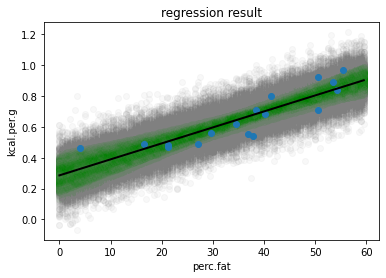

In [4]:
expr = 'kcal.per.g ~ perc.fat'

# Initializing the likelihood
likelihood = 'gaussian'

# Defining the prior with hyperparameters 
prior_a_mean = 0.5 # goal is to be close to the data
prior_a_sigma = 10
prior_a = ['gaussian', [prior_a_mean, prior_a_sigma]]

prior_b_fat_mean = 0
prior_b_fat_sigma = 1
prior_b_fat = ['gaussian', [prior_b_fat_mean, prior_b_fat_sigma]]

sigma_inf = 0
sigma_sup = 10
prior_sigma_unif = [sigma_inf, sigma_sup]
prior_sigma = ['uniform', prior_sigma_unif]

priors = [prior_a, prior_b_fat, prior_sigma]

solution_regression_fat = laplace_solution_regression(expr, data, likelihood, priors)
posterior_stats(solution_regression_fat, ['a_fat','b_fat','sigma_fat'])
posterior_plot_univariate_regression(solution_regression_fat, np.arange(0,60,0.5), data, names = ['perc.fat','kcal.per.g'])

/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: -16.952333054538315
 hess_inv: array([[ 2.62667462e-03, -5.10580181e-05, -4.17430654e-05],
       [-5.10580181e-05,  1.07881283e-06,  8.44527482e-07],
       [-4.17430654e-05,  8.44527482e-07,  1.05868093e-04]])
      jac: array([-0.00013614,  0.01889896,  0.00371861])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 419
      nit: 48
     njev: 100
   status: 2
  success: False
        x: array([ 1.22277691, -0.0118523 ,  0.06109724])
                mean        SD      7.5%     92.5%
a_lact      1.223245  0.050211  1.152118  1.295234
c_lact     -0.011855  0.001019 -0.013295 -0.010449
sigma_lact  0.060726  0.010149  0.046103  0.074669


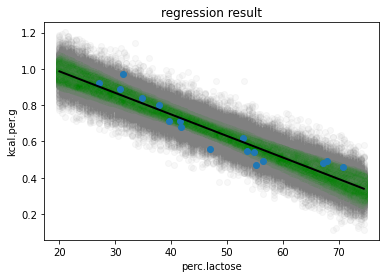

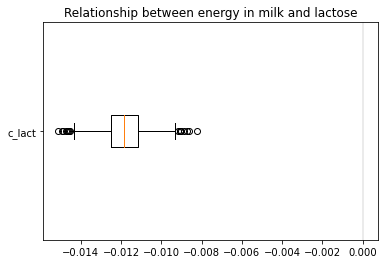

In [5]:
expr = 'kcal.per.g ~ perc.lactose'

# Initializing the likelihood
likelihood = 'gaussian'

# Defining the prior with hyperparameters 
prior_a_mean = 0.5
prior_a_sigma = 10
prior_a = ['gaussian', [prior_a_mean, prior_a_sigma]]

prior_c_lact_mean = 0
prior_c_lact_sigma = 1
prior_c_lact = ['gaussian', [prior_c_lact_mean, prior_c_lact_sigma]]

sigma_inf = 0
sigma_sup = 10
prior_sigma_unif = [sigma_inf, sigma_sup]
prior_sigma = ['uniform', prior_sigma_unif]

priors = [prior_a, prior_c_lact, prior_sigma]

solution_regression_lact = laplace_solution_regression(expr, data, likelihood, priors)
posterior_stats(solution_regression_lact, ['a_lact','c_lact','sigma_lact'])
posterior_plot_univariate_regression(solution_regression_lact, np.arange(20,75,0.5), data, names = ['perc.lactose','kcal.per.g'])

posterior_samples = post_sample_Laplace(solution_regression_lact, 1000)

boxes = []
boxes.append(posterior_samples[:,1])

plt.figure()
plt.boxplot(boxes,vert=0)
plt.yticks([1], ['c_lact'])
plt.axvline(x=0, color = 'black', alpha = 0.1)
plt.title('Relationship between energy in milk and lactose')
plt.show()

We see that in both cases, these two variables seem to be good predictors of the energy per gramm. 
It is interesting to notice that the posterior means for perc.fat and perc.lactose seem to be mirror images of one another. We see that b_fat = 0.01 while b_lact = -0.01. Moreover the 85% posterior interval for b_fat is [0.008, 0.012], while the one for b_lact is [-0.013, -0.010], both these intervals lying entirely on one side or the other of zero.

Given the strong association of the two variables with the outcome, we might conclude that both variables are reliable predictors of the total energy in milk across species. The more fat, the more kilocalories in milk, and the more lactose the fewer kilocalories in milk. This observation naturally leads to the following question:

**2) What happens if we regress kcal.per.g with respect to both perc.fat and perc.lactose ?**

\begin{align}
Kcd &= a + b * \text{perc.fat} + c * \text{perc.lac}\\
Kcd &\approx N(a+b*\text{perc.fat}+c*\text{perc.lac}, \sigma)
\end{align}

      fun: -16.23355942769029
 hess_inv: array([[ 4.94876531e-02, -5.48614286e-04, -6.19861656e-04,
         6.50620238e-05],
       [-5.48614286e-04,  6.45796932e-06,  6.63430275e-06,
        -9.45391950e-07],
       [-6.19861656e-04,  6.63430275e-06,  7.99905678e-06,
        -5.43534725e-07],
       [ 6.50620238e-05, -9.45391950e-07, -5.43534725e-07,
         9.57011076e-05]])
      jac: array([-1.14440918e-05, -1.11818314e-04, -7.86781311e-04,  2.38418579e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 472
      nit: 47
     njev: 92
   status: 2
  success: False
        x: array([ 1.07911028,  0.00171469, -0.01013612,  0.06038505])
            mean        SD      7.5%     92.5%
a       1.083269  0.224144  0.763610  1.400109
b_fat   0.001690  0.002530 -0.002083  0.005306
c_lact -0.010208  0.002881 -0.014265 -0.006049
sigma   0.060207  0.009922  0.045645  0.074191


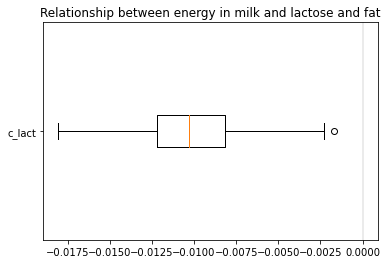

In [6]:
expr = 'kcal.per.g ~ perc.fat + perc.lactose'

# Initializing the likelihood
likelihood = 'gaussian'

# Defining the prior with hyperparameters 
prior_a_mean = 0.5
prior_a_sigma = 10
prior_a = ['gaussian', [prior_a_mean, prior_a_sigma]]

prior_b_fat_mean = 0
prior_b_fat_sigma = 1
prior_b_fat = ['gaussian', [prior_b_fat_mean, prior_b_fat_sigma]]

prior_c_lact_mean = 0
prior_c_lact_sigma = 1
prior_c_lact = ['gaussian', [prior_c_lact_mean, prior_c_lact_sigma]]

sigma_inf = 0
sigma_sup = 10
prior_sigma_unif = [sigma_inf, sigma_sup]
prior_sigma = ['uniform', prior_sigma_unif]

priors = [prior_a, prior_b_fat, prior_c_lact, prior_sigma]

solution_regression = laplace_solution_regression(expr, data, likelihood, priors)
posterior_stats(solution_regression, ['a','b_fat', 'c_lact', 'sigma'])

posterior_samples = post_sample_Laplace(solution_regression, 1000)

boxes = []
boxes.append(posterior_samples[:,2])

plt.figure()
plt.boxplot(boxes,vert=0)
plt.yticks([1], ['c_lact'])
plt.axvline(x=0, color = 'black', alpha = 0.1)
plt.title('Relationship between energy in milk and lactose and fat')
plt.show()

We observe that the posterior means for both b_fat and c_lact are closer to zero, and their standard deviation is twice as large as in their respective bivariate model. The effect is much bigger for b_fat whose posterior mean is essentially zero, with a value of b_fat which has decreased of an order of magnitude, and a posterior interval covering both negative and positive values ([-0.002, 0.005]). Concerning c_lact, the tendency of the posterior mean to be closer to zero can be seen through the comparison of the two box-plots above. We see that the uncertainty is twice bigger and the median value has been slightly shifted towards zero. However, the posterior interval doesn't cross zero and despite this effect, c_lact remains a predictor able to explain the data.

Note: An increasing SD implies that the model is less sure about a parameter.

**3) Can you explain the differences observed between the results of questions 1 and 2 ?**

The main reason of what we observed earlier is that perc.fat and perc.lactose contain pretty much the same information. They are substitutes for one another.

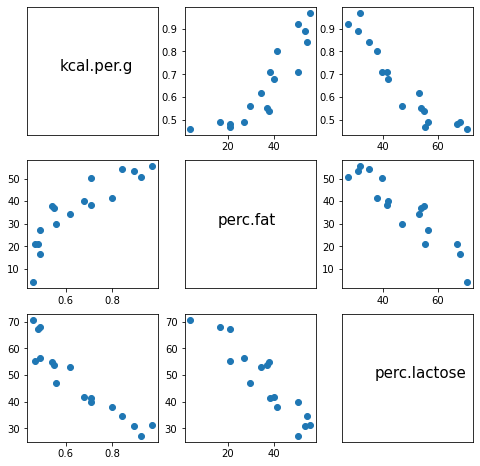

In [7]:
fields = ['kcal.per.g', 'perc.fat', 'perc.lactose']

plt.figure(figsize=(8,8))

for i, field in enumerate(fields):
    
    for j in range(len(fields)):
    
        plt.subplot(len(fields), len(fields), len(fields)*i + j + 1)
        
        if i==j:
            plt.text(0.25,0.5, field, fontsize=15)
            plt.xticks([])
            plt.yticks([])
        else:
            plt.scatter(data[fields[j]],data[field])

The plot above proposes to visualize how the different variables are related to each other. In each scatterplot off the diagonal, the vertical axis variable is the variable labeled on the same row and the horizontal axis is the variable labeled on the same column.

What is striking here is the strong correlation between perc.fat and perc.lactose. The points line up almost perfectly on a straight line. They are negatively correlated and so strongly that they are almost redundant.

In [8]:
from scipy.stats import pearsonr

pearsonr(data['perc.fat'], data['perc.lactose'])[0]


-0.9246954581668912

In [9]:
?pearsonr

We find a correlation coefficient of -0.92 between the two variables, indicating an almost negative-linear relationship between them. So finally, when we feed the model with these two variables, we're giving him redundant information, and the posterior distribution ends up describing multiple combinations of b_fat and c_lact that are equally plausible to describe the data, thus increasing the standard deviation of these two variables as we saw before. 

The strong predictive power of perc.fat in question 1 was only due to its strong correlation with perc.lact. Indeed in question 2 when we model the data with both variables, the model tells us that it only needs the perc.lact to explain the data. The effect of perc.lact is removed from perc.fat and we see that what's remaining has no impact on the prediction.

**4) Study the effect of correlation between predictors**

To answer this question you will create a dummy variable whose correlation with perc.fat varies. Then you will fit many linear regressions (let's say 10) using these two variables and observe the effect on the mean standard deviation of b_fat.

\begin{align}
\text{perc.fat}&\approx N(\mu_{fat}, \sigma_{fat})\\
corr &{:=} \rho\\
X &= \rho\mu_{fat} + \sqrt{1-\rho^2}N(0,\sigma_{fat})
\end{align}

In [10]:
corr = np.linspace(0., 0.99, 10)
print(corr)
std_err_list = []

for coeff in corr:
    data['x'] = np.random.normal(
        loc=coeff*np.mean(data['perc.fat']), 
        scale=np.sqrt((1-coeff**2))*np.std(data['perc.fat']), 
        size=data['perc.fat'].shape
    )
    
    temp_list = []
    
    for _ in range(10):
    
        expr = 'kcal.per.g ~ perc.fat + x'

        # Initializing the likelihood
        likelihood = 'gaussian'

        # Defining the prior with hyperparameters 
        prior_a_mean = 0.5
        prior_a_sigma = 10
        prior_a = ['gaussian', [prior_a_mean, prior_a_sigma]]

        prior_b_fat_mean = 0
        prior_b_fat_sigma = 1
        prior_b_fat = ['gaussian', [prior_b_fat_mean, prior_b_fat_sigma]]

        prior_c_mean = 0
        prior_c_sigma = 1
        prior_c = ['gaussian', [prior_c_mean, prior_c_sigma]]

        sigma_inf = 0
        sigma_sup = 10
        prior_sigma_unif = [sigma_inf, sigma_sup]
        prior_sigma = ['uniform', prior_sigma_unif]

        priors = [prior_a, prior_b_fat, prior_c, prior_sigma]

        solution_regression = laplace_solution_regression(expr, data, likelihood, priors)

        posterior_samples = post_sample_Laplace(solution_regression, 1000)
        temp_list.append(np.std(posterior_samples[:,1]))
        
    std_err_list.append(np.mean(temp_list))

[0.   0.11 0.22 0.33 0.44 0.55 0.66 0.77 0.88 0.99]


/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: -11.679158221140028
 hess_inv: array([[ 2.82067951e-03, -6.98279559e-05,  1.85296729e-05,
         8.90252053e-06],
       [-6.98279559e-05,  1.99707113e-06, -7.19185532e-07,
        -2.15490840e-07],
       [ 1.85296729e-05, -7.19185532e-07,  3.04547205e-06,
        -1.99730432e-07],
       [ 8.90252053e-06, -2.15490840e-07, -1.99730432e-07,
         1.81863138e-04]])
      jac: array([ 2.38418579e-07,  1.43051147e-06,  4.76837158e-07, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 296
      nit: 36
     njev: 57
   status: 0
  success: True
        x: array([2.84415279e-01, 1.03397142e-02, 1.41677895e-04, 7.89435107e-02])


/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: -11.679158221140145
 hess_inv: array([[ 2.90475287e-03, -7.13028008e-05,  2.12695074e-05,
        -2.76845588e-06],
       [-7.13028008e-05,  2.01858152e-06, -7.93188041e-07,
         7.97517566e-08],
       [ 2.12695074e-05, -7.93188041e-07,  3.11015065e-06,
         6.90879920e-08],
       [-2.76845588e-06,  7.97517566e-08,  6.90879920e-08,
         1.82368044e-04]])
      jac: array([ 0.00000000e+00, -5.00679016e-06, -1.90734863e-06,  4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 275
      nit: 32
     njev: 52
   status: 0
  success: True
        x: array([2.84415279e-01, 1.03397142e-02, 1.41677890e-04, 7.89435106e-02])


/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: -11.67915822116585
 hess_inv: array([[ 2.55778600e-03, -6.21175606e-05,  1.37466165e-05,
        -1.28318910e-05],
       [-6.21175606e-05,  1.76289487e-06, -6.17916347e-07,
         2.88420566e-07],
       [ 1.37466165e-05, -6.17916347e-07,  2.94208807e-06,
         7.52106505e-08],
       [-1.28318910e-05,  2.88420566e-07,  7.52106505e-08,
         1.78109894e-04]])
      jac: array([-0.00021243, -0.00600743,  0.00259066,  0.00019526])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 511
      nit: 34
     njev: 96
   status: 2
  success: False
        x: array([2.84415146e-01, 1.03397152e-02, 1.41686343e-04, 7.89435464e-02])


/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: -11.67915822142383
 hess_inv: array([[ 2.74971524e-03, -6.77613844e-05,  1.84484106e-05,
        -2.53152027e-05],
       [-6.77613844e-05,  1.87305656e-06, -6.89509896e-07,
         1.34166129e-07],
       [ 1.84484106e-05, -6.89509896e-07,  2.88764098e-06,
        -1.69902126e-06],
       [-2.53152027e-05,  1.34166129e-07, -1.69902126e-06,
         1.54030950e-04]])
      jac: array([-0.00043321, -0.00772214, -0.00890398,  0.00063109])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 440
      nit: 36
     njev: 84
   status: 2
  success: False
        x: array([2.84414423e-01, 1.03397356e-02, 1.41647728e-04, 7.89436263e-02])


/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: -11.679158221241297
 hess_inv: array([[ 2.82834252e-03, -6.95284203e-05,  1.98021168e-05,
        -4.56198682e-06],
       [-6.95284203e-05,  1.98256746e-06, -7.58025904e-07,
         2.03854537e-07],
       [ 1.98021168e-05, -7.58025904e-07,  3.09813674e-06,
        -5.43257728e-08],
       [-4.56198682e-06,  2.03854537e-07, -5.43257728e-08,
         1.86322335e-04]])
      jac: array([ 0.00026286,  0.01222563, -0.00267661, -0.00075507])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 385
      nit: 32
     njev: 74
   status: 2
  success: False
        x: array([2.84415122e-01, 1.03397221e-02, 1.41665576e-04, 7.89433724e-02])


/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: -11.679158221198344
 hess_inv: array([[ 2.26112127e-03, -5.87910807e-05,  6.66603686e-06,
        -2.50602279e-05],
       [-5.87910807e-05,  1.74030731e-06, -5.36875295e-07,
         6.17252055e-07],
       [ 6.66603686e-06, -5.36875295e-07,  2.58345108e-06,
         8.01148117e-07],
       [-2.50602279e-05,  6.17252055e-07,  8.01148117e-07,
         1.75201051e-04]])
      jac: array([-0.00013411, -0.003685  , -0.00137937, -0.00033498])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 467
      nit: 42
     njev: 91
   status: 2
  success: False
        x: array([2.84415131e-01, 1.03397173e-02, 1.41673789e-04, 7.89434493e-02])


/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: -11.679158221139804
 hess_inv: array([[ 2.84861809e-03, -7.00736157e-05,  2.00572097e-05,
         4.57881741e-06],
       [-7.00736157e-05,  1.99380007e-06, -7.55797723e-07,
        -7.30005661e-08],
       [ 2.00572097e-05, -7.55797723e-07,  3.18983591e-06,
        -4.78378884e-07],
       [ 4.57881741e-06, -7.30005661e-08, -4.78378884e-07,
         1.97545963e-04]])
      jac: array([ 0.00000000e+00, -4.76837158e-07,  0.00000000e+00, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 313
      nit: 38
     njev: 61
   status: 0
  success: True
        x: array([2.84415280e-01, 1.03397142e-02, 1.41677899e-04, 7.89435107e-02])


/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: -11.67915822116334
 hess_inv: array([[ 2.38719944e-03, -5.94952211e-05,  2.73952007e-05,
        -4.46113254e-06],
       [-5.94952211e-05,  1.72250808e-06, -9.21206586e-07,
         2.86148265e-07],
       [ 2.73952007e-05, -9.21206586e-07,  2.90947890e-06,
         4.23640748e-07],
       [-4.46113254e-06,  2.86148265e-07,  4.23640748e-07,
         1.76709474e-04]])
      jac: array([ 1.84774399e-05,  1.36685371e-03,  1.09541416e-03, -2.71797180e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 493
      nit: 38
     njev: 95
   status: 2
  success: False
        x: array([2.84415258e-01, 1.03397148e-02, 1.41680650e-04, 7.89435057e-02])


/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: -11.679158221306508
 hess_inv: array([[ 2.50306650e-03, -6.69597478e-05,  2.83553849e-05,
        -4.11461276e-06],
       [-6.69597478e-05,  1.94373289e-06, -8.88846071e-07,
         1.56254812e-07],
       [ 2.83553849e-05, -8.88846071e-07,  2.14338585e-06,
        -7.95636128e-08],
       [-4.11461276e-06,  1.56254812e-07, -7.95636128e-08,
         1.71888544e-04]])
      jac: array([0.00046098, 0.02258968, 0.00624251, 0.00044465])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 529
      nit: 34
     njev: 100
   status: 2
  success: False
        x: array([2.84415131e-01, 1.03397222e-02, 1.41689414e-04, 7.89435922e-02])


/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: -11.67915822116249
 hess_inv: array([[ 2.82347955e-03, -6.95181351e-05,  1.75196035e-05,
         4.90105464e-06],
       [-6.95181351e-05,  1.97791556e-06, -6.98038540e-07,
        -1.15924596e-07],
       [ 1.75196035e-05, -6.98038540e-07,  3.15692770e-06,
        -2.18865515e-07],
       [ 4.90105464e-06, -1.15924596e-07, -2.18865515e-07,
         1.84122127e-04]])
      jac: array([-1.75237656e-05, -1.32441521e-04,  2.54750252e-04,  1.79767609e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 496
      nit: 29
     njev: 94
   status: 2
  success: False
        x: array([2.84415244e-01, 1.03397150e-02, 1.41678452e-04, 7.89435436e-02])


/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: -14.23745674702963
 hess_inv: array([[ 2.36137289e-03, -5.48812907e-05, -2.00220883e-05,
        -2.92795291e-06],
       [-5.48812907e-05,  1.46301984e-06,  3.74541269e-07,
         5.07091977e-08],
       [-2.00220883e-05,  3.74541269e-07,  1.25760365e-06,
         4.56398525e-08],
       [-2.92795291e-06,  5.07091977e-08,  4.56398525e-08,
         1.41301344e-04]])
      jac: array([-0.00028062, -0.00576997, -0.00327253,  0.00061893])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 406
      nit: 36
     njev: 78
   status: 2
  success: False
        x: array([0.2438287 , 0.01110359, 0.00268552, 0.0679138 ])


/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: -14.237456746862367
 hess_inv: array([[ 2.13876298e-03, -4.93721185e-05, -1.74438481e-05,
        -3.43226251e-06],
       [-4.93721185e-05,  1.32393450e-06,  3.19192560e-07,
        -4.17739803e-08],
       [-1.74438481e-05,  3.19192560e-07,  1.03128690e-06,
         2.57779305e-07],
       [-3.43226251e-06, -4.17739803e-08,  2.57779305e-07,
         1.20608779e-04]])
      jac: array([ 5.31673431e-05,  2.64167786e-03, -1.40047073e-03, -7.03334808e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 508
      nit: 41
     njev: 99
   status: 2
  success: False
        x: array([0.24382898, 0.01110358, 0.00268552, 0.06791371])


/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: -14.237456746870809
 hess_inv: array([[ 2.28644211e-03, -5.32013128e-05, -1.68556491e-05,
         4.06378817e-07],
       [-5.32013128e-05,  1.42760632e-06,  3.11456282e-07,
         1.88768972e-08],
       [-1.68556491e-05,  3.11456282e-07,  1.16075189e-06,
        -4.42268124e-08],
       [ 4.06378817e-07,  1.88768972e-08, -4.42268124e-08,
         1.36377441e-04]])
      jac: array([-1.31130219e-06,  1.74522400e-04, -1.09672546e-05, -8.58306885e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 469
      nit: 36
     njev: 90
   status: 2
  success: False
        x: array([0.24382896, 0.01110358, 0.00268552, 0.06791372])
      fun: -14.23745674685848
 hess_inv: array([[ 2.16512690e-03, -5.04255237e-05, -1.67610926e-05,
         2.69552276e-05],
       [-5.04255237e-05,  1.34943362e-06,  3.13628154e-07,
        -8.19758400e-07],
       [-1.67610926e-05,  3.13628154e-07,  1.12632940e-06,
         1.84622940e-07],
       [ 2.69552276

/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: -14.237456746982112
 hess_inv: array([[ 1.90210022e-03, -4.46283475e-05, -2.06860242e-05,
         4.55225931e-05],
       [-4.46283475e-05,  1.22218307e-06,  3.89076333e-07,
        -8.44140857e-07],
       [-2.06860242e-05,  3.89076333e-07,  1.07317904e-06,
         4.44589574e-07],
       [ 4.55225931e-05, -8.44140857e-07,  4.44589574e-07,
         1.27142062e-04]])
      jac: array([-2.23517418e-04, -5.64813614e-03, -1.45697594e-03, -1.66893005e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 479
      nit: 43
     njev: 93
   status: 2
  success: False
        x: array([0.24382879, 0.01110358, 0.00268552, 0.06791372])
      fun: -14.237456747118951
 hess_inv: array([[ 1.80036245e-03, -3.90919462e-05, -1.68376634e-05,
         2.74501103e-05],
       [-3.90919462e-05,  1.01354525e-06,  2.94904542e-07,
        -8.43681002e-07],
       [-1.68376634e-05,  2.94904542e-07,  1.15094702e-06,
         3.55360447e-08],
       [ 2.7450110

/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: -14.237456746858276
 hess_inv: array([[ 2.23349434e-03, -5.34093452e-05, -1.83603529e-05,
         4.79390273e-05],
       [-5.34093452e-05,  1.45289682e-06,  3.61494253e-07,
        -1.26323104e-06],
       [-1.83603529e-05,  3.61494253e-07,  1.15224524e-06,
        -4.41053983e-07],
       [ 4.79390273e-05, -1.26323104e-06, -4.41053983e-07,
         1.26563316e-04]])
      jac: array([-1.19209290e-07,  1.31130219e-06,  1.43051147e-06, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 309
      nit: 44
     njev: 61
   status: 0
  success: True
        x: array([0.24382897, 0.01110358, 0.00268552, 0.06791372])


/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: -14.237456746865739
 hess_inv: array([[ 2.23873829e-03, -5.23228523e-05, -1.75408544e-05,
         4.49932582e-06],
       [-5.23228523e-05,  1.41041167e-06,  3.21974822e-07,
        -9.98726868e-08],
       [-1.75408544e-05,  3.21974822e-07,  1.20317500e-06,
        -4.24582944e-08],
       [ 4.49932582e-06, -9.98726868e-08, -4.24582944e-08,
         1.35221635e-04]])
      jac: array([ 5.29289246e-05,  8.59498978e-04,  3.88526917e-03, -5.98430634e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 420
      nit: 38
     njev: 80
   status: 2
  success: False
        x: array([0.24382898, 0.01110358, 0.00268553, 0.06791371])


/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: -14.237456747324892
 hess_inv: array([[ 2.19180026e-03, -5.04691718e-05, -1.36425155e-05,
         3.01918695e-05],
       [-5.04691718e-05,  1.35354378e-06,  2.21768353e-07,
        -6.33978148e-07],
       [-1.36425155e-05,  2.21768353e-07,  1.18169140e-06,
        -4.01440951e-07],
       [ 3.01918695e-05, -6.33978148e-07, -4.01440951e-07,
         1.35802714e-04]])
      jac: array([ 0.00020266,  0.01691186, -0.00056791,  0.00033855])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 431
      nit: 36
     njev: 83
   status: 2
  success: False
        x: array([0.24382855, 0.01110359, 0.00268552, 0.06791376])


/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: -12.158607350543443
 hess_inv: array([[ 2.28788361e-03, -5.33605891e-05, -3.81288902e-07,
         6.16963305e-05],
       [-5.33605891e-05,  1.58304381e-06, -5.71561780e-07,
        -2.84935618e-06],
       [-3.81288902e-07, -5.71561780e-07,  2.32363826e-06,
         3.51231313e-06],
       [ 6.16963305e-05, -2.84935618e-06,  3.51231313e-06,
         1.47269016e-04]])
      jac: array([-0.00016713, -0.00156724, -0.00908792, -0.00054264])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 429
      nit: 40
     njev: 83
   status: 2
  success: False
        x: array([0.28699788, 0.00980222, 0.00169799, 0.07674813])
      fun: -12.158607350424635
 hess_inv: array([[ 2.37883089e-03, -5.76498908e-05,  4.27055425e-06,
         5.96228814e-06],
       [-5.76498908e-05,  1.79790174e-06, -8.96378887e-07,
        -5.45213195e-07],
       [ 4.27055425e-06, -8.96378887e-07,  2.68697127e-06,
        -3.52308834e-07],
       [ 5.96228814e-06, -5.452131

/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: -12.15860735109673
 hess_inv: array([[ 2.43442773e-03, -6.14988023e-05,  6.03467766e-06,
         5.33368876e-06],
       [-6.14988023e-05,  1.98134666e-06, -8.75904575e-07,
        -4.04839413e-07],
       [ 6.03467766e-06, -8.75904575e-07,  2.46842818e-06,
         1.33843551e-06],
       [ 5.33368876e-06, -4.04839413e-07,  1.33843551e-06,
         1.65339322e-04]])
      jac: array([ 0.00066936,  0.04851437,  0.01074648, -0.0001924 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 405
      nit: 37
     njev: 77
   status: 2
  success: False
        x: array([0.28699698, 0.00980225, 0.00169801, 0.07674819])
      fun: -12.158607350380446
 hess_inv: array([[ 2.46940915e-03, -6.01240786e-05,  4.61907367e-06,
        -1.27987846e-05],
       [-6.01240786e-05,  1.84361961e-06, -6.67006183e-07,
        -7.56103950e-07],
       [ 4.61907367e-06, -6.67006183e-07,  1.89875445e-06,
         2.61835214e-06],
       [-1.27987846e-05, -7.5610395

/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: -12.158607350327877
 hess_inv: array([[ 2.30902391e-03, -6.00930385e-05,  9.82267239e-06,
         7.03999235e-06],
       [-6.00930385e-05,  1.98472822e-06, -9.50420192e-07,
        -4.55366317e-07],
       [ 9.82267239e-06, -9.50420192e-07,  2.54807858e-06,
        -6.10375466e-07],
       [ 7.03999235e-06, -4.55366317e-07, -6.10375466e-07,
         1.63312313e-04]])
      jac: array([ 0.00000000e+00,  2.14576721e-06, -4.76837158e-07, -7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 331
      nit: 38
     njev: 64
   status: 0
  success: True
        x: array([0.28699827, 0.0098022 , 0.00169802, 0.07674822])


/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: -12.158607350328095
 hess_inv: array([[ 3.37460007e-05, -2.32204490e-06, -3.25080957e-06,
        -3.94768252e-06],
       [-2.32204490e-06,  5.67258163e-07, -5.41057834e-07,
         2.96732884e-07],
       [-3.25080957e-06, -5.41057834e-07,  2.59185926e-06,
         7.54867248e-07],
       [-3.94768252e-06,  2.96732884e-07,  7.54867248e-07,
         6.74253820e-07]])
      jac: array([-7.15255737e-07, -1.96695328e-05, -7.15255737e-06, -2.38418579e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 387
      nit: 38
     njev: 77
   status: 2
  success: False
        x: array([0.28699827, 0.0098022 , 0.00169802, 0.07674822])


/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: -12.158607350327665
 hess_inv: array([[ 1.70830694e-04, -3.39357087e-06, -1.14849253e-06,
        -1.64965368e-04],
       [-3.39357087e-06,  5.58486261e-07, -5.79220726e-07,
         3.68698455e-06],
       [-1.14849253e-06, -5.79220726e-07,  7.26656661e-06,
        -9.13509931e-06],
       [-1.64965368e-04,  3.68698455e-06, -9.13509931e-06,
         1.74975328e-04]])
      jac: array([-1.19209290e-07,  1.19209290e-07, -2.38418579e-07,  4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 322
      nit: 36
     njev: 64
   status: 0
  success: True
        x: array([0.28699827, 0.0098022 , 0.00169802, 0.07674822])


/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: -12.158607350328362
 hess_inv: array([[ 2.86795811e-03, -5.70633965e-05, -3.61133772e-05,
         9.25928847e-04],
       [-5.70633965e-05,  1.67932804e-06, -3.23281577e-07,
        -1.77004757e-05],
       [-3.61133772e-05, -3.23281577e-07,  3.95728489e-06,
        -1.35151887e-05],
       [ 9.25928847e-04, -1.77004757e-05, -1.35151887e-05,
         3.12329800e-04]])
      jac: array([-4.76837158e-07, -1.31130219e-06,  9.53674316e-07,  1.19209290e-06])
  message: 'Optimization terminated successfully.'
     nfev: 347
      nit: 41
     njev: 69
   status: 0
  success: True
        x: array([0.28699827, 0.0098022 , 0.00169802, 0.07674822])


/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: -12.158607350328252
 hess_inv: array([[ 5.86626863e-06,  6.41561931e-07, -4.07871549e-06,
        -5.31195449e-06],
       [ 6.41561931e-07,  4.36832039e-07, -6.03517097e-07,
        -1.33920151e-06],
       [-4.07871549e-06, -6.03517097e-07,  3.18835367e-06,
         4.53278461e-06],
       [-5.31195449e-06, -1.33920151e-06,  4.53278461e-06,
         1.27324752e-05]])
      jac: array([ 2.38418579e-07,  2.15768814e-05,  1.09672546e-05, -9.53674316e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 481
      nit: 32
     njev: 92
   status: 2
  success: False
        x: array([0.28699827, 0.0098022 , 0.00169802, 0.07674822])
      fun: -12.158607350865639
 hess_inv: array([[ 2.32263321e-03, -5.39033224e-05,  8.36668346e-06,
        -1.76838372e-05],
       [-5.39033224e-05,  1.56673463e-06, -7.79282253e-07,
         7.10236335e-07],
       [ 8.36668346e-06, -7.79282253e-07,  1.99897064e-06,
        -6.05904642e-07],
       [-1.7683837

/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: -13.303467608092308
 hess_inv: array([[ 2.63001583e-03, -5.73515087e-05, -2.86568947e-05,
        -4.23290557e-06],
       [-5.73515087e-05,  1.51110682e-06,  3.08389943e-07,
         7.23914656e-08],
       [-2.86568947e-05,  3.08389943e-07,  1.62861688e-06,
         1.15019111e-06],
       [-4.23290557e-06,  7.23914656e-08,  1.15019111e-06,
         1.26268463e-04]])
      jac: array([-2.15291977e-04, -3.38196754e-03,  7.17163086e-03,  1.00135803e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 489
      nit: 37
     njev: 95
   status: 2
  success: False
        x: array([ 0.326688  ,  0.00995781, -0.00255173,  0.07175014])


/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: -13.303467607736524
 hess_inv: array([[ 2.76482115e-03, -5.95443484e-05, -2.63877911e-05,
         4.16345647e-05],
       [-5.95443484e-05,  1.55006654e-06,  2.36573906e-07,
        -8.07248505e-07],
       [-2.63877911e-05,  2.36573906e-07,  1.64834529e-06,
         7.17521222e-08],
       [ 4.16345647e-05, -8.07248505e-07,  7.17521222e-08,
         1.50925381e-04]])
      jac: array([-3.57627869e-07, -2.86102295e-06, -1.78813934e-06, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 269
      nit: 41
     njev: 53
   status: 0
  success: True
        x: array([ 0.32668861,  0.0099578 , -0.00255175,  0.07175014])


/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: -13.303467607736392
 hess_inv: array([[ 2.53029844e-03, -5.42176489e-05, -2.71556422e-05,
         8.52960093e-06],
       [-5.42176489e-05,  1.44169981e-06,  2.50799305e-07,
        -1.11752395e-07],
       [-2.71556422e-05,  2.50799305e-07,  1.67511376e-06,
        -5.86587868e-07],
       [ 8.52960093e-06, -1.11752395e-07, -5.86587868e-07,
         1.23663494e-04]])
      jac: array([-1.19209290e-07,  2.14576721e-06,  9.89437103e-06,  3.57627869e-06])
  message: 'Optimization terminated successfully.'
     nfev: 307
      nit: 46
     njev: 61
   status: 0
  success: True
        x: array([ 0.32668861,  0.0099578 , -0.00255175,  0.07175014])


/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: -13.303467607740687
 hess_inv: array([[ 3.44651215e-04, -7.06818656e-06, -5.72328384e-06,
        -2.03751055e-04],
       [-7.06818656e-06,  4.33208792e-07, -2.41260215e-07,
         4.34717722e-06],
       [-5.72328384e-06, -2.41260215e-07,  1.60179165e-06,
         2.19205070e-06],
       [-2.03751055e-04,  4.34717722e-06,  2.19205070e-06,
         1.34248120e-04]])
      jac: array([-1.19209290e-07,  7.89165497e-05, -2.26497650e-06,  2.62260437e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 437
      nit: 37
     njev: 84
   status: 2
  success: False
        x: array([ 0.32668861,  0.0099578 , -0.00255175,  0.07175014])


/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: -13.30346760801688
 hess_inv: array([[ 2.64209689e-03, -5.64227707e-05, -2.95017363e-05,
         1.63535335e-05],
       [-5.64227707e-05,  1.48884494e-06,  2.81566653e-07,
        -2.25310190e-07],
       [-2.95017363e-05,  2.81566653e-07,  1.77723005e-06,
        -6.16989904e-07],
       [ 1.63535335e-05, -2.25310190e-07, -6.16989904e-07,
         1.32315553e-04]])
      jac: array([ 0.00107193,  0.04551232,  0.02082598, -0.00057888])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 464
      nit: 44
     njev: 90
   status: 2
  success: False
        x: array([ 0.32668826,  0.00995782, -0.00255173,  0.07175005])


/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: -13.303467607736497
 hess_inv: array([[ 3.45443013e-06, -5.81159774e-07,  1.56056035e-07,
         5.64922431e-06],
       [-5.81159774e-07,  5.49166191e-07, -5.43087176e-07,
        -5.68054226e-06],
       [ 1.56056035e-07, -5.43087176e-07,  1.54437874e-06,
         3.92931326e-06],
       [ 5.64922431e-06, -5.68054226e-06,  3.92931326e-06,
         2.63429029e-04]])
      jac: array([-1.66893005e-06, -6.29425049e-05, -5.36441803e-06,  2.86102295e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 338
      nit: 39
     njev: 66
   status: 2
  success: False
        x: array([ 0.32668861,  0.0099578 , -0.00255175,  0.07175014])


/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: -13.303467608591397
 hess_inv: array([[ 2.68238496e-03, -5.57440496e-05, -3.01807008e-05,
        -1.58836578e-05],
       [-5.57440496e-05,  1.41871566e-06,  2.58374906e-07,
         4.07730719e-07],
       [-3.01807008e-05,  2.58374906e-07,  1.53880763e-06,
        -6.31969396e-07],
       [-1.58836578e-05,  4.07730719e-07, -6.31969396e-07,
         1.31598794e-04]])
      jac: array([0.00090933, 0.0607574 , 0.02849245, 0.00025511])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 454
      nit: 35
     njev: 88
   status: 2
  success: False
        x: array([ 0.32668668,  0.00995785, -0.0025517 ,  0.07175018])


/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: -13.303467607739522
 hess_inv: array([[ 2.59856476e-03, -5.45933886e-05, -2.96772523e-05,
        -1.57158347e-06],
       [-5.45933886e-05,  1.40340614e-06,  2.75953394e-07,
        -3.54427694e-08],
       [-2.96772523e-05,  2.75953394e-07,  1.75817747e-06,
         5.31790140e-07],
       [-1.57158347e-06, -3.54427694e-08,  5.31790140e-07,
         1.46001441e-04]])
      jac: array([-3.57627869e-06, -9.53674316e-06, -1.26242638e-04, -7.55786896e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 402
      nit: 39
     njev: 77
   status: 2
  success: False
        x: array([ 0.32668861,  0.0099578 , -0.00255175,  0.07175013])


/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: -13.30346760780588
 hess_inv: array([[ 2.40913739e-03, -5.02132104e-05, -2.79237958e-05,
         4.90799372e-05],
       [-5.02132104e-05,  1.30702378e-06,  2.44092251e-07,
        -1.77838068e-06],
       [-2.79237958e-05,  2.44092251e-07,  1.74260083e-06,
         2.69119524e-07],
       [ 4.90799372e-05, -1.77838068e-06,  2.69119524e-07,
         1.31895717e-04]])
      jac: array([ 0.00015891,  0.00900745, -0.00224745, -0.00016713])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 493
      nit: 42
     njev: 95
   status: 2
  success: False
        x: array([ 0.32668859,  0.00995781, -0.00255175,  0.07175011])


/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: -12.718056364606959
 hess_inv: array([[ 2.67239116e-03, -5.27548167e-05, -2.31765903e-05,
         5.01143935e-06],
       [-5.27548167e-05,  1.61746836e-06, -2.88068086e-07,
        -6.33044411e-07],
       [-2.31765903e-05, -2.88068086e-07,  1.74527187e-06,
         9.45751155e-07],
       [ 5.01143935e-06, -6.33044411e-07,  9.45751155e-07,
         1.51655845e-04]])
      jac: array([7.41481781e-05, 2.85160542e-03, 2.07591057e-03, 1.44004822e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 390
      nit: 31
     njev: 75
   status: 2
  success: False
        x: array([0.25847005, 0.00999744, 0.00201311, 0.07426337])


/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: -12.718056364667284
 hess_inv: array([[ 1.68852650e-03, -3.39233412e-05, -2.01632013e-05,
         5.00033282e-05],
       [-3.39233412e-05,  1.24642856e-06, -3.35769503e-07,
        -8.43012914e-07],
       [-2.01632013e-05, -3.35769503e-07,  1.69676035e-06,
         2.06412393e-09],
       [ 5.00033282e-05, -8.43012914e-07,  2.06412393e-09,
         1.56001169e-04]])
      jac: array([-1.53064728e-04, -3.77154350e-03, -3.48377228e-03, -9.79900360e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 388
      nit: 36
     njev: 74
   status: 2
  success: False
        x: array([0.25846992, 0.00999744, 0.00201311, 0.07426333])


/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: -12.718056364601182
 hess_inv: array([[ 2.56820102e-03, -5.10101799e-05, -2.08289983e-05,
        -5.66318294e-06],
       [-5.10101799e-05,  1.55089859e-06, -2.39706039e-07,
        -4.48340330e-08],
       [-2.08289983e-05, -2.39706039e-07,  1.44474207e-06,
         8.84230781e-08],
       [-5.66318294e-06, -4.48340330e-08,  8.84230781e-08,
         1.58568885e-04]])
      jac: array([ 1.35898590e-05,  6.79016113e-04,  1.84774399e-04, -1.21593475e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 438
      nit: 36
     njev: 85
   status: 2
  success: False
        x: array([0.25847005, 0.00999744, 0.00201311, 0.07426334])
      fun: -12.718056364592758
 hess_inv: array([[ 1.09790341e-05, -2.01087906e-06,  3.00923982e-06,
        -5.41982231e-07],
       [-2.01087906e-06,  6.30501577e-07, -7.68052458e-07,
         7.12741269e-07],
       [ 3.00923982e-06, -7.68052458e-07,  1.49221075e-06,
        -1.13549767e-06],
       [-5.4198223

/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: -12.718056364944271
 hess_inv: array([[ 2.16442123e-03, -4.14833529e-05, -1.16118443e-05,
         2.34634224e-05],
       [-4.14833529e-05,  1.34653831e-06, -5.56587962e-07,
        -9.59783000e-07],
       [-1.16118443e-05, -5.56587962e-07,  1.42203023e-06,
        -8.67759542e-07],
       [ 2.34634224e-05, -9.59783000e-07, -8.67759542e-07,
         1.52835796e-04]])
      jac: array([ 0.00067067,  0.03268242,  0.02119827, -0.00032401])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 552
      nit: 41
     njev: 106
   status: 2
  success: False
        x: array([0.25846963, 0.00999745, 0.00201312, 0.07426329])


/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: -12.718056364627062
 hess_inv: array([[ 2.45669740e-03, -4.85749995e-05, -2.07282125e-05,
         2.66178054e-05],
       [-4.85749995e-05,  1.50784485e-06, -2.97626722e-07,
        -2.24773587e-07],
       [-2.07282125e-05, -2.97626722e-07,  1.65372002e-06,
        -3.60910803e-07],
       [ 2.66178054e-05, -2.24773587e-07, -3.60910803e-07,
         1.47586033e-04]])
      jac: array([3.65972519e-05, 1.97875500e-03, 8.06212425e-04, 1.19209290e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 439
      nit: 45
     njev: 85
   status: 2
  success: False
        x: array([0.25847003, 0.00999744, 0.00201311, 0.07426336])


/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: -12.718056364604495
 hess_inv: array([[ 2.11398165e-03, -4.41958258e-05, -1.61083795e-05,
         5.87289914e-05],
       [-4.41958258e-05,  1.47449190e-06, -3.94896406e-07,
        -6.21125645e-07],
       [-1.61083795e-05, -3.94896406e-07,  1.65459069e-06,
        -1.00468225e-06],
       [ 5.87289914e-05, -6.21125645e-07, -1.00468225e-06,
         1.53462853e-04]])
      jac: array([-5.28097153e-05, -1.73246861e-03, -6.01887703e-04, -5.24520874e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 371
      nit: 41
     njev: 71
   status: 2
  success: False
        x: array([0.25847002, 0.00999744, 0.00201311, 0.07426334])


/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: -12.718056364631915
 hess_inv: array([[ 2.84071674e-03, -5.40840580e-05, -2.80132257e-05,
        -1.05698905e-05],
       [-5.40840580e-05,  1.66722782e-06, -3.06254961e-07,
         9.57269612e-08],
       [-2.80132257e-05, -3.06254961e-07,  2.01248330e-06,
         2.59834818e-07],
       [-1.05698905e-05,  9.57269612e-08,  2.59834818e-07,
         1.67172909e-04]])
      jac: array([6.61611557e-05, 3.39996815e-03, 3.09586525e-04, 3.79085541e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 394
      nit: 30
     njev: 74
   status: 2
  success: False
        x: array([0.25847004, 0.00999744, 0.00201311, 0.07426335])


/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: -12.718056365353558
 hess_inv: array([[ 2.17811408e-03, -4.14093872e-05, -2.15701158e-05,
        -8.39945116e-05],
       [-4.14093872e-05,  1.12692306e-06, -7.31315988e-08,
         1.87727365e-06],
       [-2.15701158e-05, -7.31315988e-08,  1.45830112e-06,
         5.56984052e-07],
       [-8.39945116e-05,  1.87727365e-06,  5.56984052e-07,
         1.45097847e-04]])
      jac: array([ 7.29560852e-05,  2.26898193e-02,  1.52423382e-02, -3.47137451e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 443
      nit: 30
     njev: 85
   status: 2
  success: False
        x: array([0.25846869, 0.00999747, 0.00201313, 0.07426329])
      fun: -12.718056364672705
 hess_inv: array([[ 2.47373269e-03, -4.91356521e-05, -1.92417553e-05,
         2.99941827e-06],
       [-4.91356521e-05,  1.52452648e-06, -3.47043209e-07,
         2.64926602e-07],
       [-1.92417553e-05, -3.47043209e-07,  1.61147675e-06,
        -2.82060026e-07],
       [ 2.9994182

/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: -11.678652925768812
 hess_inv: array([[ 3.25533437e-03, -5.18855522e-05, -5.17008769e-05,
        -1.41615746e-05],
       [-5.18855522e-05,  1.73963619e-06, -5.41318113e-07,
         4.15816690e-07],
       [-5.17008769e-05, -5.41318113e-07,  3.52406707e-06,
        -2.21717842e-08],
       [-1.41615746e-05,  4.15816690e-07, -2.21717842e-08,
         1.80927991e-04]])
      jac: array([-0.00029206, -0.00242257, -0.00101757,  0.00114584])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 443
      nit: 37
     njev: 85
   status: 2
  success: False
        x: array([2.81730802e-01, 1.03413036e-02, 1.52096841e-04, 7.89460401e-02])


/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: -11.67865292551927
 hess_inv: array([[ 2.07445676e-03, -2.52382532e-05, -4.07366902e-05,
        -6.86804972e-05],
       [-2.52382532e-05,  9.93286228e-07, -6.93090184e-07,
         7.56895621e-07],
       [-4.07366902e-05, -6.93090184e-07,  3.52954068e-06,
         1.71744742e-06],
       [-6.86804972e-05,  7.56895621e-07,  1.71744742e-06,
         1.77215065e-04]])
      jac: array([-2.09808350e-04, -7.38763809e-03, -2.27403641e-03,  7.29560852e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 442
      nit: 42
     njev: 85
   status: 2
  success: False
        x: array([2.81731407e-01, 1.03412904e-02, 1.52091767e-04, 7.89458434e-02])


/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: -11.678652925506132
 hess_inv: array([[ 3.38616302e-03, -5.54158724e-05, -5.16849655e-05,
        -6.41271217e-06],
       [-5.54158724e-05,  2.04316980e-06, -9.32355317e-07,
         8.52001060e-08],
       [-5.16849655e-05, -9.32355317e-07,  4.36217612e-06,
         1.39026218e-07],
       [-6.41271217e-06,  8.52001060e-08,  1.39026218e-07,
         1.83311001e-04]])
      jac: array([ 4.29153442e-06,  2.48193741e-04,  6.49690628e-05, -1.40666962e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 477
      nit: 38
     njev: 92
   status: 2
  success: False
        x: array([2.81731586e-01, 1.03412918e-02, 1.52083981e-04, 7.89458276e-02])


/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: -11.678652925527508
 hess_inv: array([[ 3.27146209e-03, -4.97301904e-05, -5.75486036e-05,
         1.65013708e-05],
       [-4.97301904e-05,  1.56768350e-06, -3.20385258e-07,
        -1.05903806e-07],
       [-5.75486036e-05, -3.20385258e-07,  3.49890211e-06,
        -2.18597563e-07],
       [ 1.65013708e-05, -1.05903806e-07, -2.18597563e-07,
         1.77750294e-04]])
      jac: array([-3.17096710e-05, -8.27074051e-04,  3.92436981e-04,  1.84774399e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 439
      nit: 28
     njev: 83
   status: 2
  success: False
        x: array([2.81731507e-01, 1.03412914e-02, 1.52088179e-04, 7.89458639e-02])


/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: -11.678652925512928
 hess_inv: array([[ 3.46030972e-03, -5.78035919e-05, -5.14066610e-05,
         3.10886823e-06],
       [-5.78035919e-05,  2.07094859e-06, -8.72447065e-07,
         7.75565676e-08],
       [-5.14066610e-05, -8.72447065e-07,  4.24642934e-06,
         6.79656694e-08],
       [ 3.10886823e-06,  7.75565676e-08,  6.79656694e-08,
         1.89865970e-04]])
      jac: array([1.12295151e-04, 4.11891937e-03, 2.98547745e-03, 1.19209290e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 436
      nit: 37
     njev: 84
   status: 2
  success: False
        x: array([2.81731586e-01, 1.03412911e-02, 1.52087445e-04, 7.89458303e-02])


/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: -11.678652925504117
 hess_inv: array([[ 3.27104048e-03, -5.37802361e-05, -5.03378380e-05,
         6.50234288e-06],
       [-5.37802361e-05,  2.00706924e-06, -9.16093423e-07,
        -1.21770461e-07],
       [-5.03378380e-05, -9.16093423e-07,  4.26598543e-06,
        -1.34617305e-07],
       [ 6.50234288e-06, -1.21770461e-07, -1.34617305e-07,
         1.83455298e-04]])
      jac: array([-2.62260437e-06, -6.42538071e-05, -3.63588333e-05, -6.67572021e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 388
      nit: 32
     njev: 75
   status: 2
  success: False
        x: array([2.81731584e-01, 1.03412917e-02, 1.52084198e-04, 7.89458289e-02])


/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: -11.678652925504977
 hess_inv: array([[ 3.07544876e-03, -4.78295564e-05, -5.12447864e-05,
         5.06604583e-06],
       [-4.78295564e-05,  1.78289286e-06, -8.08739623e-07,
         3.59870533e-07],
       [-5.12447864e-05, -8.08739623e-07,  4.07134137e-06,
        -1.04725247e-06],
       [ 5.06604583e-06,  3.59870533e-07, -1.04725247e-06,
         1.77780712e-04]])
      jac: array([-3.21865082e-06, -6.89029694e-05, -1.23739243e-04,  1.43051147e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 484
      nit: 35
     njev: 94
   status: 2
  success: False
        x: array([2.81731585e-01, 1.03412918e-02, 1.52083885e-04, 7.89458303e-02])


/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: -11.6786529255034
 hess_inv: array([[ 3.28279778e-03, -5.25451664e-05, -5.17083488e-05,
        -8.92317631e-06],
       [-5.25451664e-05,  1.91904861e-06, -8.64670388e-07,
         1.56146164e-07],
       [-5.17083488e-05, -8.64670388e-07,  4.23902450e-06,
         2.60474102e-08],
       [-8.92317631e-06,  1.56146164e-07,  2.60474102e-08,
         1.82437516e-04]])
      jac: array([-7.15255737e-07, -2.50339508e-05,  6.05583191e-05,  2.38418579e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 450
      nit: 35
     njev: 86
   status: 2
  success: False
        x: array([2.81731584e-01, 1.03412916e-02, 1.52084479e-04, 7.89458302e-02])


/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: -11.678652925503359
 hess_inv: array([[ 3.58377396e-03, -5.82765013e-05, -5.35625668e-05,
         4.31722826e-06],
       [-5.82765013e-05,  1.96388150e-06, -7.15843832e-07,
        -5.15058467e-07],
       [-5.35625668e-05, -7.15843832e-07,  3.98882592e-06,
         8.27060330e-07],
       [ 4.31722826e-06, -5.15058467e-07,  8.27060330e-07,
         1.68643005e-04]])
      jac: array([-4.76837158e-07, -1.54972076e-06, -1.78813934e-06,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 317
      nit: 47
     njev: 63
   status: 0
  success: True
        x: array([2.81731586e-01, 1.03412917e-02, 1.52084182e-04, 7.89458301e-02])


/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: -11.678652925570443
 hess_inv: array([[ 3.48082238e-03, -5.60337732e-05, -5.62585812e-05,
         2.38327576e-05],
       [-5.60337732e-05,  2.02605148e-06, -8.76748940e-07,
        -2.54770097e-07],
       [-5.62585812e-05, -8.76748940e-07,  4.52448213e-06,
        -7.75412477e-07],
       [ 2.38327576e-05, -2.54770097e-07, -7.75412477e-07,
         1.86510450e-04]])
      jac: array([1.19924545e-04, 5.27453423e-03, 5.19299507e-03, 8.58306885e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 448
      nit: 30
     njev: 85
   status: 2
  success: False
        x: array([2.81731435e-01, 1.03412910e-02, 1.52095410e-04, 7.89458317e-02])


/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: -12.24562118751118
 hess_inv: array([[ 4.36058570e-03, -3.96738670e-05, -8.63520126e-05,
        -1.31212153e-05],
       [-3.96738670e-05,  2.23671939e-06, -1.34701743e-06,
         8.56308519e-07],
       [-8.63520126e-05, -1.34701743e-06,  4.49915279e-06,
        -6.88574091e-07],
       [-1.31212153e-05,  8.56308519e-07, -6.88574091e-07,
         1.81148181e-04]])
      jac: array([2.38418579e-07, 7.74860382e-06, 4.76837158e-06, 0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 279
      nit: 38
     njev: 55
   status: 0
  success: True
        x: array([0.24004759, 0.00967917, 0.00227634, 0.07635589])


/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: -12.245621187511647
 hess_inv: array([[ 2.47880747e-04, -3.41951831e-05,  4.95370830e-05,
         1.10543686e-04],
       [-3.41951831e-05,  4.87429044e-06, -6.75699234e-06,
        -1.52622852e-05],
       [ 4.95370830e-05, -6.75699234e-06,  1.00515547e-05,
         2.20914716e-05],
       [ 1.10543686e-04, -1.52622852e-05,  2.20914716e-05,
         4.93372735e-05]])
      jac: array([4.76837158e-07, 2.11000443e-05, 2.27689743e-05, 4.76837158e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 432
      nit: 48
     njev: 86
   status: 2
  success: False
        x: array([0.24004759, 0.00967917, 0.00227634, 0.07635589])


/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: -12.245621187513695
 hess_inv: array([[ 3.72388468e-03, -3.21966954e-05, -7.47813586e-05,
         1.27284065e-05],
       [-3.21966954e-05,  1.93467329e-06, -1.24539191e-06,
         7.07208252e-08],
       [-7.47813586e-05, -1.24539191e-06,  3.98518046e-06,
        -7.87534666e-07],
       [ 1.27284065e-05,  7.07208252e-08, -7.87534666e-07,
         1.65504031e-04]])
      jac: array([8.34465027e-06, 4.24385071e-04, 2.14576721e-04, 5.45978546e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 416
      nit: 45
     njev: 80
   status: 2
  success: False
        x: array([0.24004759, 0.00967917, 0.00227634, 0.0763559 ])


/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: -12.245621187686915
 hess_inv: array([[ 3.82907471e-03, -3.04594838e-05, -8.12539159e-05,
        -1.14707788e-05],
       [-3.04594838e-05,  1.96632947e-06, -1.35694161e-06,
         4.21152656e-07],
       [-8.12539159e-05, -1.35694161e-06,  4.35542390e-06,
         4.33728322e-07],
       [-1.14707788e-05,  4.21152656e-07,  4.33728322e-07,
         1.43596882e-04]])
      jac: array([0.00024652, 0.00763977, 0.01479673, 0.00026011])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 471
      nit: 46
     njev: 91
   status: 2
  success: False
        x: array([0.2400471 , 0.00967915, 0.00227637, 0.07635594])


/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: -12.245621187511137
 hess_inv: array([[ 3.85503245e-03, -3.25454017e-05, -7.88982260e-05,
        -1.56716186e-05],
       [-3.25454017e-05,  1.98739314e-06, -1.28764690e-06,
        -1.05874080e-07],
       [-7.88982260e-05, -1.28764690e-06,  4.17115316e-06,
         6.70640123e-07],
       [-1.56716186e-05, -1.05874080e-07,  6.70640123e-07,
         1.69265737e-04]])
      jac: array([ 0.00000000e+00,  4.05311584e-06,  5.00679016e-06, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 295
      nit: 38
     njev: 58
   status: 0
  success: True
        x: array([0.24004759, 0.00967917, 0.00227634, 0.07635589])


/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: -12.245621187881017
 hess_inv: array([[ 3.90550788e-03, -3.21511281e-05, -7.84232964e-05,
        -1.05254768e-05],
       [-3.21511281e-05,  1.67583416e-06, -9.85084946e-07,
         3.50948113e-07],
       [-7.84232964e-05, -9.85084946e-07,  3.78034628e-06,
        -1.73988382e-07],
       [-1.05254768e-05,  3.50948113e-07, -1.73988382e-07,
         1.57433509e-04]])
      jac: array([-0.0001502 ,  0.01065552, -0.002913  ,  0.00102329])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 488
      nit: 37
     njev: 94
   status: 2
  success: False
        x: array([0.24004684, 0.0096792 , 0.00227632, 0.07635607])


/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: -12.245621187511492
 hess_inv: array([[ 4.03627212e-03, -3.20716722e-05, -8.42449887e-05,
        -7.29103279e-06],
       [-3.20716722e-05,  1.87593791e-06, -1.18588430e-06,
         8.66345254e-08],
       [-8.42449887e-05, -1.18588430e-06,  4.20426525e-06,
        -3.26199791e-08],
       [-7.29103279e-06,  8.66345254e-08, -3.26199791e-08,
         1.69185738e-04]])
      jac: array([-2.38418579e-07, -4.64916229e-06, -4.05311584e-06, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 323
      nit: 34
     njev: 62
   status: 0
  success: True
        x: array([0.24004759, 0.00967917, 0.00227634, 0.07635589])


/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: -12.24562118771334
 hess_inv: array([[ 4.39435781e-03, -3.96331329e-05, -8.64203147e-05,
        -2.15753957e-05],
       [-3.96331329e-05,  2.35264953e-06, -1.47903368e-06,
         1.20900857e-06],
       [-8.64203147e-05, -1.47903368e-06,  4.60137322e-06,
        -6.11599332e-07],
       [-2.15753957e-05,  1.20900857e-06, -6.11599332e-07,
         1.80709377e-04]])
      jac: array([ 0.00078571,  0.03013277,  0.02973616, -0.00012851])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 531
      nit: 39
     njev: 101
   status: 2
  success: False
        x: array([0.24004728, 0.00967916, 0.00227636, 0.07635587])


/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: -12.24562118792468
 hess_inv: array([[ 4.15526958e-03, -3.48644841e-05, -8.51798014e-05,
         7.11066149e-06],
       [-3.48644841e-05,  2.12058713e-06, -1.38459531e-06,
         1.16748324e-07],
       [-8.51798014e-05, -1.38459531e-06,  4.50879501e-06,
        -5.41724992e-07],
       [ 7.11066149e-06,  1.16748324e-07, -5.41724992e-07,
         1.76194459e-04]])
      jac: array([-7.18116760e-04, -1.73900127e-02, -1.65426731e-02,  2.90870667e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 375
      nit: 40
     njev: 72
   status: 2
  success: False
        x: array([0.24004662, 0.00967918, 0.00227635, 0.0763559 ])


/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: -12.245621187511027
 hess_inv: array([[ 4.14529329e-03, -3.52435816e-05, -8.40704904e-05,
         1.96329212e-07],
       [-3.52435816e-05,  2.09313890e-06, -1.33742531e-06,
         2.71986181e-09],
       [-8.40704904e-05, -1.33742531e-06,  4.39503972e-06,
        -1.80649586e-08],
       [ 1.96329212e-07,  2.71986181e-09, -1.80649586e-08,
         1.72344154e-04]])
      jac: array([1.19209290e-07, 7.15255737e-07, 4.76837158e-07, 0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 305
      nit: 24
     njev: 58
   status: 0
  success: True
        x: array([0.24004759, 0.00967917, 0.00227634, 0.07635589])
      fun: -11.680250150660196
 hess_inv: array([[ 7.64323614e-03, -7.59527158e-05, -1.64337725e-04,
         2.07972969e-05],
       [-7.59527158e-05,  1.71728362e-06,  5.24718853e-07,
         1.10847360e-07],
       [-1.64337725e-04,  5.24718853e-07,  5.20520320e-06,
        -1.20678825e-06],
       [ 2.07972969e-05,  1.10847360e-07, -1.20

/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: -11.68025015050879
 hess_inv: array([[ 9.04371637e-03, -8.80821058e-05, -1.92939835e-04,
         4.46179522e-06],
       [-8.80821058e-05,  1.95746601e-06,  6.09347052e-07,
        -1.12968133e-07],
       [-1.92939835e-04,  6.09347052e-07,  6.00413088e-06,
        -4.30399725e-08],
       [ 4.46179522e-06, -1.12968133e-07, -4.30399725e-08,
         1.84885284e-04]])
      jac: array([-4.00543213e-05, -1.30295753e-03, -8.52584839e-04,  9.77516174e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 389
      nit: 38
     njev: 75
   status: 2
  success: False
        x: array([ 2.90916183e-01,  1.03480618e-02, -2.26412117e-04,  7.89385057e-02])
      fun: -11.680250150465003
 hess_inv: array([[ 9.82591353e-03, -8.96589651e-05, -2.18374607e-04,
         2.83036785e-05],
       [-8.96589651e-05,  1.79494778e-06,  8.79566512e-07,
         6.66382116e-08],
       [-2.18374607e-04,  8.79566512e-07,  6.48836904e-06,
        -7.34409843e-07],

/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: -11.680250150464104
 hess_inv: array([[ 8.20105085e-03, -8.04701497e-05, -1.72057081e-04,
        -4.19799499e-06],
       [-8.04701497e-05,  1.82481732e-06,  5.04310449e-07,
         4.28043523e-08],
       [-1.72057081e-04,  5.04310449e-07,  5.36992247e-06,
         2.29381477e-08],
       [-4.19799499e-06,  4.28043523e-08,  2.29381477e-08,
         1.80847170e-04]])
      jac: array([ 1.19209290e-07, -5.72204590e-06, -5.72204590e-06,  2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 245
      nit: 34
     njev: 48
   status: 0
  success: True
        x: array([ 2.90916266e-01,  1.03480613e-02, -2.26413951e-04,  7.89385040e-02])


/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: -11.680250150500688
 hess_inv: array([[ 7.55170437e-03, -5.90967853e-05, -1.80115437e-04,
        -5.87594464e-05],
       [-5.90967853e-05,  1.30719515e-06,  4.69415226e-07,
         1.78113866e-06],
       [-1.80115437e-04,  4.69415226e-07,  5.73071480e-06,
         2.37309875e-07],
       [-5.87594464e-05,  1.78113866e-06,  2.37309875e-07,
         1.60128626e-04]])
      jac: array([ 3.89814377e-05,  2.24375725e-03,  9.51886177e-04, -2.88486481e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 462
      nit: 39
     njev: 89
   status: 2
  success: False
        x: array([ 2.90916238e-01,  1.03480628e-02, -2.26414324e-04,  7.89384986e-02])


/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: -11.680250150465803
 hess_inv: array([[ 9.11879518e-03, -8.65959369e-05, -2.00894549e-04,
        -7.44416734e-05],
       [-8.65959369e-05,  1.88061885e-06,  6.87557899e-07,
         9.29417718e-07],
       [-2.00894549e-04,  6.87557899e-07,  6.24980692e-06,
         1.32764236e-06],
       [-7.44416734e-05,  9.29417718e-07,  1.32764236e-06,
         1.84213839e-04]])
      jac: array([2.38418579e-07, 3.57627869e-06, 3.93390656e-06, 2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 241
      nit: 31
     njev: 46
   status: 0
  success: True
        x: array([ 2.90916264e-01,  1.03480614e-02, -2.26413891e-04,  7.89385039e-02])


/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: -11.680250150464193
 hess_inv: array([[ 8.48185067e-03, -8.27418413e-05, -1.81894537e-04,
         3.28521475e-05],
       [-8.27418413e-05,  1.77365724e-06,  6.68485333e-07,
         2.06554355e-07],
       [-1.81894537e-04,  6.68485333e-07,  5.56814305e-06,
        -1.16492373e-06],
       [ 3.28521475e-05,  2.06554355e-07, -1.16492373e-06,
         1.64629296e-04]])
      jac: array([ 1.19209290e-07, -5.48362732e-06, -2.86102295e-06,  2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 319
      nit: 42
     njev: 63
   status: 0
  success: True
        x: array([ 2.90916266e-01,  1.03480613e-02, -2.26413941e-04,  7.89385039e-02])


/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: -11.680250151414754
 hess_inv: array([[ 8.33136008e-03, -8.01341994e-05, -1.80234299e-04,
         5.81368996e-05],
       [-8.01341994e-05,  1.80924842e-06,  5.44699849e-07,
        -5.50780715e-07],
       [-1.80234299e-04,  5.44699849e-07,  5.68039183e-06,
        -1.09174203e-06],
       [ 5.81368996e-05, -5.50780715e-07, -1.09174203e-06,
         1.78343799e-04]])
      jac: array([-1.89423561e-04,  5.96046448e-05, -7.46250153e-05,  1.62839890e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 367
      nit: 28
     njev: 71
   status: 2
  success: False
        x: array([ 2.90914576e-01,  1.03480778e-02, -2.26377871e-04,  7.89385338e-02])


/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: -11.6802501521739
 hess_inv: array([[ 8.96490333e-03, -8.61696317e-05, -1.92222305e-04,
        -6.75282699e-06],
       [-8.61696317e-05,  1.72394478e-06,  7.62353757e-07,
         9.08393827e-07],
       [-1.92222305e-04,  7.62353757e-07,  5.83272755e-06,
        -4.68603322e-07],
       [-6.75282699e-06,  9.08393827e-07, -4.68603322e-07,
         1.71548383e-04]])
      jac: array([0.00015509, 0.01767743, 0.02448106, 0.00082445])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 523
      nit: 35
     njev: 100
   status: 2
  success: False
        x: array([ 2.90911414e-01,  1.03480972e-02, -2.26287151e-04,  7.89386549e-02])


/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: -11.680250150464596
 hess_inv: array([[ 8.53833194e-03, -8.46629722e-05, -1.76841199e-04,
        -1.17399954e-05],
       [-8.46629722e-05,  1.84713880e-06,  5.89025783e-07,
         2.55286886e-07],
       [-1.76841199e-04,  5.89025783e-07,  5.41317320e-06,
         1.26390999e-08],
       [-1.17399954e-05,  2.55286886e-07,  1.26390999e-08,
         1.79283124e-04]])
      jac: array([ 1.19209290e-07, -4.52995300e-06, -3.93390656e-06,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 330
      nit: 42
     njev: 65
   status: 0
  success: True
        x: array([ 2.90916265e-01,  1.03480613e-02, -2.26413932e-04,  7.89385039e-02])


/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: -11.684642651933164
 hess_inv: array([[ 5.46728835e-03, -1.39434964e-05, -1.45493321e-04,
         3.10251327e-05],
       [-1.39434964e-05,  1.64186665e-06, -1.39344157e-06,
        -2.08917350e-07],
       [-1.45493321e-04, -1.39344157e-06,  6.09093524e-06,
        -7.66785376e-07],
       [ 3.10251327e-05, -2.08917350e-07, -7.66785376e-07,
         1.75520535e-04]])
      jac: array([9.65595245e-06, 1.31106377e-03, 5.66005707e-04, 7.72476196e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 344
      nit: 40
     njev: 66
   status: 2
  success: False
        x: array([ 0.29254077,  0.01042564, -0.00033871,  0.07891814])


/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: -11.684642652758825
 hess_inv: array([[ 7.33314920e-03, -3.93156024e-05, -1.73162674e-04,
        -6.58193160e-06],
       [-3.93156024e-05,  1.95990257e-06, -9.54550934e-07,
        -1.33508730e-08],
       [-1.73162674e-04, -9.54550934e-07,  6.46489343e-06,
         2.50918341e-07],
       [-6.58193160e-06, -1.33508730e-08,  2.50918341e-07,
         1.85435850e-04]])
      jac: array([-0.00043583, -0.00934434, -0.00468135, -0.00087571])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 384
      nit: 31
     njev: 72
   status: 2
  success: False
        x: array([ 0.29253882,  0.01042564, -0.00033866,  0.07891796])
      fun: -11.684642651872093
 hess_inv: array([[ 7.09116891e-03, -3.71377076e-05, -1.68257346e-04,
         4.62505636e-06],
       [-3.71377076e-05,  1.94241259e-06, -1.02423015e-06,
        -1.56443430e-07],
       [-1.68257346e-04, -1.02423015e-06,  6.40467557e-06,
         5.24947137e-08],
       [ 4.62505636e-06, -1.56

/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: -11.68464265216602
 hess_inv: array([[ 8.15843933e-03, -3.62879070e-05, -2.00262770e-04,
         1.39057991e-05],
       [-3.62879070e-05,  2.17128199e-06, -1.31861118e-06,
        -5.89185905e-07],
       [-2.00262770e-04, -1.31861118e-06,  7.68413475e-06,
         4.02885477e-07],
       [ 1.39057991e-05, -5.89185905e-07,  4.02885477e-07,
         1.89971728e-04]])
      jac: array([-0.00034642, -0.01213622, -0.00790215,  0.00047517])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 445
      nit: 34
     njev: 84
   status: 2
  success: False
        x: array([ 0.29254015,  0.01042564, -0.00033869,  0.07891821])


/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: -11.684642651936484
 hess_inv: array([[ 7.42381387e-03, -3.67229434e-05, -1.78857001e-04,
         1.60517066e-05],
       [-3.67229434e-05,  2.14291195e-06, -1.25756110e-06,
         7.06743622e-07],
       [-1.78857001e-04, -1.25756110e-06,  6.98836091e-06,
        -1.30565942e-06],
       [ 1.60517066e-05,  7.06743622e-07, -1.30565942e-06,
         1.85470672e-04]])
      jac: array([-7.90357590e-05, -1.14691257e-03, -2.44653225e-03,  7.39097595e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 422
      nit: 30
     njev: 81
   status: 2
  success: False
        x: array([ 0.29254074,  0.01042564, -0.00033871,  0.07891812])


/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: -11.68464265187982
 hess_inv: array([[ 6.28085462e-03, -2.62671443e-05, -1.51700855e-04,
        -2.04286053e-05],
       [-2.62671443e-05,  1.62557118e-06, -1.10649096e-06,
         4.19470008e-08],
       [-1.51700855e-04, -1.10649096e-06,  5.94849017e-06,
         7.11755095e-07],
       [-2.04286053e-05,  4.19470008e-08,  7.11755095e-07,
         1.79916075e-04]])
      jac: array([-1.88350677e-05, -6.54339790e-04, -5.09023666e-04, -2.83718109e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 389
      nit: 40
     njev: 74
   status: 2
  success: False
        x: array([ 0.29254082,  0.01042564, -0.00033871,  0.07891812])


/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: -11.68464265272935
 hess_inv: array([[ 6.69799219e-03, -4.03040290e-05, -1.61212045e-04,
        -2.77283651e-05],
       [-4.03040290e-05,  1.85178784e-06, -8.37485139e-07,
        -6.49506813e-07],
       [-1.61212045e-04, -8.37485139e-07,  6.11443343e-06,
         1.86031442e-06],
       [-2.77283651e-05, -6.49506813e-07,  1.86031442e-06,
         1.43788348e-04]])
      jac: array([ 4.37498093e-05,  1.03920698e-02,  1.53990984e-02, -2.11381912e-03])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 521
      nit: 33
     njev: 100
   status: 2
  success: False
        x: array([ 0.29253809,  0.01042564, -0.00033863,  0.07891773])


/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: -11.68464265187006
 hess_inv: array([[ 7.19339024e-03, -3.87468350e-05, -1.71830840e-04,
         1.42177028e-04],
       [-3.87468350e-05,  1.85275063e-06, -8.67407953e-07,
        -8.48106867e-07],
       [-1.71830840e-04, -8.67407953e-07,  6.37265001e-06,
        -3.36190206e-06],
       [ 1.42177028e-04, -8.48106867e-07, -3.36190206e-06,
         1.82589740e-04]])
      jac: array([-2.38418579e-07,  6.43730164e-06,  5.24520874e-06,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 328
      nit: 50
     njev: 65
   status: 0
  success: True
        x: array([ 0.29254085,  0.01042564, -0.00033871,  0.07891812])


/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: -11.684642651866618
 hess_inv: array([[ 6.80350072e-03, -3.48757923e-05, -1.62935114e-04,
        -3.60251984e-05],
       [-3.48757923e-05,  1.87113181e-06, -1.01677272e-06,
         5.15330751e-07],
       [-1.62935114e-04, -1.01677272e-06,  6.26423890e-06,
         2.10602548e-07],
       [-3.60251984e-05,  5.15330751e-07,  2.10602548e-07,
         1.47477165e-04]])
      jac: array([7.15255737e-07, 4.05311584e-06, 3.81469727e-06, 1.43051147e-06])
  message: 'Optimization terminated successfully.'
     nfev: 314
      nit: 49
     njev: 62
   status: 0
  success: True
        x: array([ 0.29254085,  0.01042564, -0.00033871,  0.07891812])


/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: -11.684642651896493
 hess_inv: array([[ 7.33151088e-03, -3.74457994e-05, -1.74733902e-04,
        -9.27502888e-06],
       [-3.74457994e-05,  1.98398702e-06, -1.05158192e-06,
        -4.92608706e-07],
       [-1.74733902e-04, -1.05158192e-06,  6.61076047e-06,
         5.91704142e-07],
       [-9.27502888e-06, -4.92608706e-07,  5.91704142e-07,
         1.81490777e-04]])
      jac: array([-1.90734863e-06,  5.63859940e-04,  3.33786011e-06, -9.53674316e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 365
      nit: 34
     njev: 70
   status: 2
  success: False
        x: array([ 0.29254082,  0.01042564, -0.00033871,  0.07891812])


/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: -11.712607099466032
 hess_inv: array([[ 4.28731561e-02, -7.65547793e-05, -1.14025393e-03,
        -3.25326311e-04],
       [-7.65547793e-05,  1.47099385e-06,  5.36426388e-07,
         5.42114261e-07],
       [-1.14025393e-03,  5.36426388e-07,  3.21905615e-05,
         9.20268567e-06],
       [-3.25326311e-04,  5.42114261e-07,  9.20268567e-06,
         1.73234469e-04]])
      jac: array([0.0014807 , 0.06210887, 0.05683613, 0.00124359])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 426
      nit: 36
     njev: 82
   status: 2
  success: False
        x: array([0.21510311, 0.01034197, 0.00198224, 0.07878775])


/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: 84.2630748087957
 hess_inv: array([[ 9.99445556e-01, -2.51208213e-03, -2.58436759e-02,
        -2.56757361e-05],
       [-2.51208213e-03,  2.92689598e-02, -3.00014861e-02,
         1.94088918e-02],
       [-2.58436759e-02, -3.00014861e-02,  3.45440023e-02,
        -1.78624312e-02],
       [-2.56757361e-05,  1.94088918e-02, -1.78624312e-02,
         3.19674202e-01]])
      jac: array([  2.41959763, 106.31383514,  87.98186493,  -2.67296124])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 95
      nit: 3
     njev: 16
   status: 2
  success: False
        x: array([-6.61529929,  0.4680693 ,  0.14090347,  9.96636496])


/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: -11.71260709470836
 hess_inv: array([[ 6.49983716e-02, -2.05142461e-05, -1.81788946e-03,
         6.25607328e-06],
       [-2.05142461e-05,  1.64782052e-06, -1.12814108e-06,
        -9.09518669e-08],
       [-1.81788946e-03, -1.12814108e-06,  5.28935168e-05,
        -6.15597760e-08],
       [ 6.25607328e-06, -9.09518669e-08, -6.15597760e-08,
         1.82231893e-04]])
      jac: array([-0.00051713, -0.01670182, -0.01767874, -0.00010395])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 430
      nit: 40
     njev: 82
   status: 2
  success: False
        x: array([0.21511073, 0.01034196, 0.00198201, 0.0787875 ])


/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: -11.712607095229066
 hess_inv: array([[ 7.06057188e-02, -5.88726119e-05, -1.94565565e-03,
        -1.21009008e-04],
       [-5.88726119e-05,  1.83707515e-06, -1.93573959e-07,
         6.46112127e-07],
       [-1.94565565e-03, -1.93573959e-07,  5.57606297e-05,
         2.92882066e-06],
       [-1.21009008e-04,  6.46112127e-07,  2.92882066e-06,
         1.86263634e-04]])
      jac: array([0.00013113, 0.00664532, 0.00544322, 0.00029993])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 384
      nit: 37
     njev: 74
   status: 2
  success: False
        x: array([0.21511026, 0.01034196, 0.00198203, 0.07878758])


/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: -11.712607094103305
 hess_inv: array([[ 1.03442352e-05,  9.28157354e-07, -1.03017427e-05,
         2.10210177e-06],
       [ 9.28157354e-07,  2.03306141e-06, -9.33935112e-07,
        -7.81780750e-07],
       [-1.03017427e-05, -9.33935112e-07,  1.02597317e-05,
        -2.08882138e-06],
       [ 2.10210177e-06, -7.81780750e-07, -2.08882138e-06,
         9.18550431e-07]])
      jac: array([4.76837158e-07, 1.45435333e-05, 1.38282776e-05, 2.38418579e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 574
      nit: 46
     njev: 111
   status: 2
  success: False
        x: array([0.21511185, 0.01034196, 0.00198199, 0.07878752])


/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: -11.712607095056914
 hess_inv: array([[ 6.57550139e-02, -4.02505720e-05, -1.82143490e-03,
        -7.14290282e-05],
       [-4.02505720e-05,  1.77739725e-06, -6.87942871e-07,
         6.48842559e-07],
       [-1.82143490e-03, -6.87942871e-07,  5.26066255e-05,
         1.18741048e-06],
       [-7.14290282e-05,  6.48842559e-07,  1.18741048e-06,
         1.78560500e-04]])
      jac: array([-7.39097595e-06,  5.28764725e-03,  4.06980515e-04, -5.98192215e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 345
      nit: 34
     njev: 64
   status: 2
  success: False
        x: array([0.21511044, 0.01034196, 0.00198202, 0.07878741])


/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: 1392.5571210108183
 hess_inv: array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]])
      jac: array([  21.22782898,  801.96708679,  746.15585327, -264.60768127])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 39
      nit: 0
     njev: 6
   status: 2
  success: False
        x: array([11.95006862,  1.11022237,  2.05224126,  9.96651751])


/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: -11.712607094089382
 hess_inv: array([[ 4.86627726e-02, -9.41542960e-05, -1.30861116e-03,
        -1.07155447e-04],
       [-9.41542960e-05,  1.42059107e-06,  1.08541174e-06,
         8.49105205e-08],
       [-1.30861116e-03,  1.08541174e-06,  3.70656829e-05,
         2.71586128e-06],
       [-1.07155447e-04,  8.49105205e-08,  2.71586128e-06,
         1.80049520e-04]])
      jac: array([ 3.50475311e-05,  1.83522701e-03,  1.20019913e-03, -8.84532928e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 458
      nit: 38
     njev: 88
   status: 2
  success: False
        x: array([0.21511189, 0.01034196, 0.00198198, 0.07878751])


/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: -11.712607094164206
 hess_inv: array([[ 5.56163338e-02, -2.34287327e-05, -1.53283626e-03,
        -8.17154092e-05],
       [-2.34287327e-05,  1.63313105e-06, -1.04082000e-06,
        -4.24858577e-07],
       [-1.53283626e-03, -1.04082000e-06,  4.42440044e-05,
         2.40219154e-06],
       [-8.17154092e-05, -4.24858577e-07,  2.40219154e-06,
         1.57566697e-04]])
      jac: array([-0.00186253, -0.08211517, -0.06418657, -0.00074673])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 360
      nit: 32
     njev: 69
   status: 2
  success: False
        x: array([0.21510952, 0.01034193, 0.00198206, 0.07878739])
      fun: -11.712607094098207
 hess_inv: array([[ 1.78705397e-05,  4.29968044e-06, -5.39927086e-06,
         2.15752344e-06],
       [ 4.29968044e-06,  2.32532126e-06, -2.14278254e-06,
         4.78873447e-06],
       [-5.39927086e-06, -2.14278254e-06,  2.60007304e-06,
        -9.78586334e-07],
       [ 2.15752344e-06,  4.788734

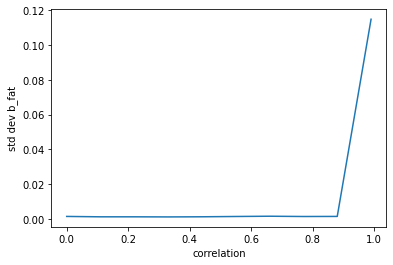

In [11]:
plt.figure()
plt.plot(corr, std_err_list)
plt.xlabel('correlation')
plt.ylabel('std dev b_fat')
plt.show()

We plotted above the evolution of the standard deviation of the posterior. We observe that when the two variables are uncorrelated, the standard deviation of the plot is small. This means that the posterior is piled up a narrow range of values. As the correlation increases, the standard deviation inflates in a non-linear way and grows very rapidly when we approach 1. Yet, what we did here was just adding random numbers through the x variable that don't mean anything. However, this dummy variable brings some sort of redundancy when its correlation with perc.fat becomes too strong, thus pushing the model to be more uncertain about perc.fat as it has now more "possibilities" to explain the data.

# Exercise 2  (Statistical Rethinking, McElreath et al, Chapter 6)

**1) Using the *Milk* dataset  of the previous exercise, fit four different models for describing the kcal.per.g data :**

- One with both neocortex and log_mass
- One with neocortex
- One with log_mass
- One with no predictor (an intercept only)

**For each of this model, you will compute their WAIC with standard error (SE), dWAIC with standard error (dSE), pWAIC, and the weight criteria. What can you conclude by analyzing these numbers ? You will present the results in a table.**

<hr>

**WAIC**:  widely applicable information criterion

**PPD**: pointwise predictive distribution

\begin{align}
l_{ppd}&=\overset{n}{\underset{i=1}{\sum}}p_{post}(y_i)\\
&=\overset{n}{\underset{i=1}{\sum}}log\int p(y_i|\theta)p_{post}(\theta)d\theta\\
\theta^s, s&=1, ..., S\\
P_{post}(\theta)&:=p(\theta|y)\\
\hat{l}_{ppd}&=\frac{1}{S}\overset{S}{\underset{i=1}{\sum}}p(y_i|\theta^s)\\
&=\overset{n}{\underset{i=1}{\sum}}\big(log \big(\overset{S}{\underset{s=1}{\sum}} p(y_i|\theta^s)\big)-log(S)\big)\\
p_{waic}&=\overset{n}{\underset{i=1}{\sum}}Var_{post}(log(p(y_i|\theta)))\\
\hat{p}_{waic}&=\overset{n}{\underset{i=1}{\sum}}V^slog(p(y_i|\theta^s))\quad\text{variance of }log(p(y_i\theta^s))\\
WAIC&=-2(\hat{l}_{ppd}-\hat{p}_{WAIC})\\
\end{align}

<hr>

We denote by neocortex the variable necortex.perc / 100.

dWAIC is the difference between each WAIC and the lowest WAIC among the models.
 
The standard error (SE) of a score S is given by:

$$
SE = \sqrt{Npoints * var(S)}
$$

The weight criteria is the *Akaike weight* which is given for model i by the formula:

$$w_i = \frac{\exp(-0.5dWAIC_i)}{\sum_j \exp(-0.5dWAIC_j)}$$

In [12]:
data['log_mass'] = np.log(data['mass'])
data['neocortex'] = data['neocortex.perc'] / 100

\begin{align}
l_{ppd\_vec}&=[\quad i\,:\,log\big(\underset{S}{\sum}p(y_i|\theta)\big)-log(S)\quad]\\
pWAIC_{vec}&=[\quad i\,:\,V^Slog(p(y_i|\theta))\quad]\\\\
waic\_vect\_model1 &= -2(l_{ppd\_vec} - pWAIC_{vec})
\end{align}

\begin{align}
Kcal &= a + b_{neo}.{neocortex} + c_{logmax}.logmax\\
Kcal &\sim N(a+b_{neo}.{neocortex} + c_{logmax}.logmax, \sigma)
\end{align}

In [24]:
expr = 'kcal.per.g ~ neocortex + log_mass'

N = 5000 # corresponds to S

lppd = []
p_waic = []

# Initializing the likelihood
likelihood = 'gaussian'

# Defining the prior with hyperparameters 
prior_a_mean = 0.5
prior_a_sigma = 10
prior_a = ['gaussian', [prior_a_mean, prior_a_sigma]]

prior_b_neoc_mean = 0
prior_b_neoc_sigma = 1
prior_b_neoc = ['gaussian', [prior_b_neoc_mean, prior_b_neoc_sigma]]

prior_c_mass_mean = 0
prior_c_mass_sigma = 1
prior_c_mass = ['gaussian', [prior_c_mass_mean, prior_c_mass_sigma]]

sigma_inf = 0
sigma_sup = 10
prior_sigma_unif = [sigma_inf, sigma_sup]
prior_sigma = ['uniform', prior_sigma_unif]

priors = [prior_a, prior_b_neoc, prior_c_mass, prior_sigma]

solution_regression1 = laplace_solution_regression(expr, data, likelihood, priors)
posterior_samples = post_sample_Laplace(solution_regression1, N)
    
for t, target in enumerate(data['kcal.per.g']):
    log_p = []
    for l in range(N):
        pred = posterior_samples[l,0] + posterior_samples[l,1]*data['neocortex'][t] + posterior_samples[l,2]*data['log_mass'][t]
        log_p.append(norm.logpdf(target, loc=pred, scale=posterior_samples[l,-1]))

    lppd.append(logsumexp(log_p) - np.log(len(log_p)))
    p_waic.append(np.var(log_p))

waic_vect_model1 = -2*(np.array(lppd) - np.array(p_waic))
waic_model1 = -2*(np.sum(lppd) - np.sum(p_waic))
p_waic_model1 = np.sum(p_waic)
se_model1 = np.sqrt(len(data['kcal.per.g'])*np.var(waic_vect_model1))

print(waic_model1)
print(p_waic_model1)
print(se_model1)

/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: -2.807004536221907
 hess_inv: array([[ 1.65213655e-01, -2.55280088e-01,  5.43711615e-03,
         3.19157326e-03],
       [-2.55280088e-01,  3.97836435e-01, -9.04695813e-03,
        -4.97062061e-03],
       [ 5.43711615e-03, -9.04695813e-03,  4.51583769e-04,
         1.11169165e-04],
       [ 3.19157326e-03, -4.97062061e-03,  1.11169165e-04,
         4.81050301e-04]])
      jac: array([3.57627869e-07, 2.38418579e-07, 2.14576721e-06, 3.33786011e-06])
  message: 'Optimization terminated successfully.'
     nfev: 179
      nit: 18
     njev: 34
   status: 0
  success: True
        x: array([-0.4169958 ,  1.75055183, -0.07223301,  0.12152374])
-13.09121898319489
4.837656791781497
8.226428550502579


In [25]:
expr = 'kcal.per.g ~ neocortex'

N = 5000

lppd = []
p_waic = []

# Initializing the likelihood
likelihood = 'gaussian'

priors = [prior_a, prior_b_neoc, prior_sigma]

solution_regression2 = laplace_solution_regression(expr, data, likelihood, priors)
posterior_samples = post_sample_Laplace(solution_regression2, N)
    
for t, target in enumerate(data['kcal.per.g']):
    log_p = []
    for l in range(N):
        pred = posterior_samples[l,0] + posterior_samples[l,1]*data['neocortex'][t]
        log_p.append(norm.logpdf(target, loc=pred, scale=posterior_samples[l,-1]))

    lppd.append(logsumexp(log_p) - np.log(len(log_p)))
    p_waic.append(np.var(log_p))

waic_vect_model2 = -2*(np.array(lppd) - np.array(p_waic))
waic_model2 = -2*(np.sum(lppd) - np.sum(p_waic))
p_waic_model2 = np.sum(p_waic)
se_model2 = np.sqrt(len(data['kcal.per.g'])*np.var(waic_vect_model2))

print(waic_model2)
print(p_waic_model2)
print(se_model2)

/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: 0.07437175602642299
 hess_inv: array([[ 0.16270242, -0.23740773,  0.00067707],
       [-0.23740773,  0.34998446, -0.00100394],
       [ 0.00067707, -0.00100394,  0.00081388]])
      jac: array([8.64267349e-06, 5.00679016e-06, 3.39746475e-06])
  message: 'Optimization terminated successfully.'
     nfev: 151
      nit: 26
     njev: 37
   status: 0
  success: True
        x: array([0.45251   , 0.30356664, 0.16591535])
-5.167889340343749
3.4375118435110283
4.907504651749962


In [26]:
expr = 'kcal.per.g ~ log_mass'

N = 5000

lppd = []
p_waic = []

# Initializing the likelihood
likelihood = 'gaussian'

priors = [prior_a, prior_c_mass, prior_sigma]

solution_regression3 = laplace_solution_regression(expr, data, likelihood, priors)
posterior_samples = post_sample_Laplace(solution_regression3, N)
    
for t, target in enumerate(data['kcal.per.g']):
    log_p = []
    for l in range(N):
        pred = posterior_samples[l,0] + posterior_samples[l,1]*data['log_mass'][t]
        log_p.append(norm.logpdf(target, loc=pred, scale=posterior_samples[l,-1]))

    lppd.append(logsumexp(log_p) - np.log(len(log_p)))
    p_waic.append(np.var(log_p))
    
waic_vect_model3 = -2*(np.array(lppd) - np.array(p_waic))
waic_model3 = -2*(np.sum(lppd) - np.sum(p_waic))
p_waic_model3 = np.sum(p_waic)
se_model3 = np.sqrt(len(data['kcal.per.g'])*np.var(waic_vect_model3))

print(waic_model3)
print(p_waic_model3)
print(se_model3)

      fun: -0.9252914722069763
 hess_inv: array([[ 2.33985281e-03, -6.20092292e-04,  1.31097754e-05],
       [-6.20092292e-04,  3.34473994e-04,  2.53125775e-05],
       [ 1.31097754e-05,  2.53125775e-05,  7.12903660e-04]])
      jac: array([2.80141830e-06, 1.09672546e-05, 3.15904617e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 276
      nit: 24
     njev: 66
   status: 2
  success: False
        x: array([ 0.7051323 , -0.03167327,  0.15685835])
-7.642198928803715
3.2593455546007144
6.2060488593352074


In [27]:
data['intercept_regression'] = np.zeros(data['kcal.per.g'].shape)

expr = 'kcal.per.g ~ intercept_regression'

N = 5000

lppd = []
p_waic = []

# Initializing the likelihood
likelihood = 'gaussian'

priors = [prior_a, prior_sigma]

solution_regression4 = laplace_solution_regression(expr, data, likelihood, priors)
posterior_samples = post_sample_Laplace(solution_regression4, N)
    
for t, target in enumerate(data['kcal.per.g']):
    log_p = []
    for l in range(N):
        pred = posterior_samples[l,0]
        log_p.append(norm.logpdf(target, loc=pred, scale=posterior_samples[l,-1]))

    lppd.append(logsumexp(log_p) - np.log(len(log_p)))
    p_waic.append(np.var(log_p))
    
waic_vect_model4 = -2*(np.array(lppd) - np.array(p_waic))
waic_model4 = -2*(np.sum(lppd) - np.sum(p_waic))
p_waic_model4 = np.sum(p_waic)
se_model4 = np.sqrt(len(data['kcal.per.g'])*np.var(waic_vect_model4))

print(waic_model4)
print(p_waic_model4)
print(se_model4)

/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/quentin/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: -0.7049164341426843
 hess_inv: array([[ 1.65094197e-03, -7.96432423e-07],
       [-7.96432423e-07,  8.26467640e-04]])
      jac: array([-5.96046448e-08, -1.37090683e-06])
  message: 'Optimization terminated successfully.'
     nfev: 152
      nit: 15
     njev: 46
   status: 0
  success: True
        x: array([0.65764444, 0.16773681])
-7.233209998528722
2.3443168250840727
5.015515971460085


In [28]:
waic = np.array([waic_model1, waic_model2, waic_model3, waic_model4])
waic_vect = np.array([waic_vect_model1, waic_vect_model2, waic_vect_model3, waic_vect_model4])
p_waic = np.array([p_waic_model1, p_waic_model2, p_waic_model3, p_waic_model4])
se = np.array([se_model1, se_model2, se_model3, se_model4])

d_waic = np.zeros(waic.shape)
weights = np.zeros(waic.shape)
d_se = np.zeros(waic.shape)

for i in range(len(waic)):
    d_waic[i] = np.abs(waic[i] - min(waic))

min_index = np.argmin(d_waic)

for i in range(len(waic)):
    weights[i] = np.exp(-0.5*d_waic[i]) / (np.sum(np.exp(-0.5*d_waic)))
    
    if i != min_index:
        d_se[i] = np.sqrt(len(data['kcal.per.g'])*np.var(waic_vect[i] - waic_vect[min_index]))
    else:
        d_se[i] = np.nan


summary_stats = [waic, p_waic, d_waic, weights, se, d_se]
summary_stats = pd.DataFrame(summary_stats).transpose()
summary_stats.columns = ['WAIC', 'pWAIC', 'dWAIC', 'weight', 'SE', 'd_SE']
summary_stats.index = ['model1', 'model2', 'model3', 'model4']
#summary_stats.rename(index=list(names), inplace=True)
print(summary_stats)

             WAIC     pWAIC     dWAIC    weight        SE      d_SE
model1 -13.091219  4.837657  0.000000  0.878688  8.226429       NaN
model2  -5.167889  3.437512  7.923330  0.016723  4.907505  6.872329
model3  -7.642199  3.259346  5.449020  0.057623  6.206049  4.023589
model4  -7.233210  2.344317  5.858009  0.046966  5.015516  6.557458


The WAIC should be interpreted as measure of performance when the model is applied on unseen data. And the SE will help evaluating the uncertainty associated with the WAIC. Within this context, it seems that the first model is the one performing best for this particular dataset. The Akaike weight helps also to intepret how these different models perform with repsect to each other by giving a relative measure of reliability. The weight should be interpreted as *the probability that the model will make the best predictions on new data, conditional on the set of models considered*. Again we see that following the heuristic, the first model seems to be the best choice. However in this example, we have a very low sample size (17 data points) leading to substantial errors on the WAIC estimates that naturaly propagate on the Akaike weights. You should also note that if you look at the dWAIC, you might intepret it as saying that the distance between the model you're looking at and the top-model can be seen as a Gaussian with mean dWAIC and standard deviation d_SE. Let's consider model2 for instance.

In [30]:
# best model smaller WAIC
# input values by hand in loc and scale.

samples = np.random.normal(loc=7.923330, scale=6.872329, size=100000)
print(np.sum(samples<0.)/len(samples))

0.12677


This tells us that there exists a probability that model2 performs better than model1. However, for such a small sample size this is still a good result and we can remain confident that in this context model1 is the best option. 

So what should we conclude about this short study ?

It is quite clear that in this context we benefit of using the two predictors (model1). With only 17 cases, the association between the predictors and the outcome are strong enough to give 75% of the model weight to model1. However adding more data or testing new models would change the results and relationships between models and the analysis would need to be re-run. 

**2) In order to better intepret the results of question 2, analyze the posterior estimates of the slope parameters for the different models. Present the results using box plots.**

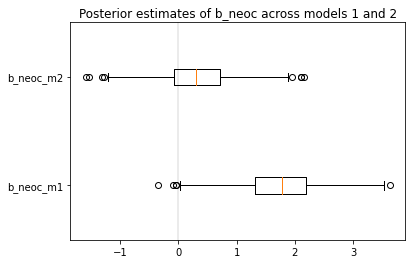

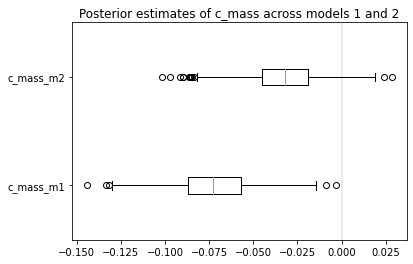

In [19]:
posterior_samples1 = post_sample_Laplace(solution_regression1, 1000)
posterior_samples2 = post_sample_Laplace(solution_regression2, 1000)
posterior_samples3 = post_sample_Laplace(solution_regression3, 1000)
posterior_samples4 = post_sample_Laplace(solution_regression4, 1000)

boxes = []
boxes.append(posterior_samples1[:,1])
boxes.append(posterior_samples1[:,2])
boxes.append(posterior_samples2[:,1])
boxes.append(posterior_samples3[:,1])


plt.figure()
plt.boxplot([boxes[0], boxes[2]],vert=0)
plt.yticks([1, 2], ['b_neoc_m1', 'b_neoc_m2'])
plt.axvline(x=0, color = 'black', alpha = 0.1)
plt.title('Posterior estimates of b_neoc across models 1 and 2')
plt.show()

plt.figure()
plt.boxplot([boxes[1], boxes[3]],vert=0)
plt.yticks([1, 2], ['c_mass_m1', 'c_mass_m2'])
plt.axvline(x=0, color = 'black', alpha = 0.1)
plt.title('Posterior estimates of c_mass across models 1 and 2')
plt.show()

These two boxplots show us how the posterior estimates for b_neoc and c_mass are moved farther from zero when they are both present in the model. By looking at the posterior estimates we see that each parameter becomes more "important" when the other is added to the model. This importance in terms of magnitude is also coupled with the lowset WAIC value for model1, thus supporting the fact that this is the best suited model (among the ones we tested) to describe this dataset.

# Exercise 3

In this exercise we will show how to use the Laplace approximation by deriving the equations on an example.

Consider a random variable $\theta$ following a uniform distribution on [0, 1]. Let's consider a dummy experiment in which two outcomes are possible (success and failure). The experiment is made n times with k successes. The experiments are independent from each other. The probability of success is given by $\theta$. We will denote by y the random variable describing the number of successes. 

**1) Write the data likelihood and the posterior distribution $p(\theta|y)$ (up to constant).**

We can consider that given $\theta$, y follows a binomial distribution. Therefore the data likelihood is:

$$
   p(y|\theta) = \binom{n}{k}\theta^{k}(1-\theta)^{n-k}.
$$
   
This is also proportional to the posterior distribution $p(\theta|y)$ as $\theta$ is given a uniform prior on [0, 1].

\begin{align}
g(\theta) &= log(\theta^y(1-\theta)^{n-y}) = ylog(\theta) + (n-y)log(1-theta)\\
g'(\theta) &= frac{y}{\theta} - \frac{n-y}{1-\theta} &\rightarrow \theta_0\,:\,g'(\theta_0) = 0 \Rightarrow \theta_{0-} = \frac{n}{y}\\
g''(\theta) &= - frac{y}{\theta^2} + \frac{n-y}{(1-\theta^2)} &\rightarrow \theta_0\,:\,g''(\theta_0) = 0 \Rightarrow \theta_{0-} = -\frac{n^2}{y(n-y)}\\
\end{align}

$$N(\theta_0,\sqrt{-\frac{1}{g''(\theta)}}) = N(\frac{y}{n},\sqrt{\frac{y(n-y)}{n^3}})$$

**2) Estimate the posterior distribution $p(\theta|y)$ using the Laplace approximation. You will derive the computations yourself.**

For any probability density function (pdf) that is smooth and well-peaked around its point of maxima, Laplace proposed to approximate it by a normal pdf. To do so he used a 2-term Taylor expansion trick around the local maxima of the log-pdf. Let denote $g(\theta) = \log p(\theta|y)$ and $\theta_0$ its maximum.

Following the Taylor expansion we can write:
$$
g(\theta) = g(\theta_0) + g'(\theta_0)(\theta - \theta_0) + \frac{1}{2}g''(\theta_0)(\theta - \theta_0)^2.
$$

We know g reaches a local maxima in $\theta_0$, therefore $g'(\theta_0)$ and :

$$
g(\theta) = g(\theta_0) + \frac{1}{2}g''(\theta_0)(\theta - \theta_0)^2.
$$

If we exponentiate this epxression we obtain :

$$
\exp (g(\theta)) = p(\theta|y) = \exp(g(\theta_0)) exp(\frac{1}{2}g''(\theta_0)(\theta - \theta_0)^2).
$$

This can be identified to a Gaussian with mean $\theta_0$ and variance $-\frac{1}{g''(\theta_0)}$.

As a result we need to compute the derivative of $g(\theta)$ and find the point $\theta_0$ that cancels it.
We obtain :

$$
g'(\theta) = \frac{k}{\theta} - \frac{n-k}{1-\theta}.
$$

And $\theta_0 = \frac{k}{n}$.

Now for the second order derivative we have :

$$
g''(\theta) = -\frac{k}{\theta^{2}} - \frac{n-k}{(1-\theta)^{2}}.
$$

The second order derivative in $\theta_0$ is $g''(\theta_0) = -\frac{n^3}{k(n-k)}$ which gives us a variance $\frac{k(n-k)}{n^3}$.

**3) Plot the posterior pdf of $\theta$ obtained with the Laplace approximation and the true posterior.**


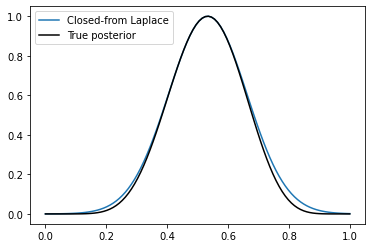

In [20]:
k = 8
n = 15

xs = np.linspace(0., 1., 100)

analytical_mean = float(k) / float(n)
analytical_sigma = np.sqrt((k*(n-k))/n**3)

plt.figure()
plt.plot(xs, norm.pdf(xs, loc=analytical_mean, scale=analytical_sigma)/np.max(norm.pdf(xs, loc=analytical_mean, scale=analytical_sigma)), label='Closed-from Laplace')
plt.plot(xs, binom.pmf(k=k, n=n, p=xs)/np.max(binom.pmf(k=k, n=n, p=xs)), label='True posterior', color='black')
plt.legend()
plt.show()